# Check the data

In [51]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc70/BHOSS_CODE"
data = "Rh1_Rl1_sig1_i70_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A0_147.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9503.533402 Rg/c, inclination: 70.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 2.73539e-09 0.000852604
Total flux = 1.956237 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9104.090482 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 2.96973e-09 0.00255031
Total flux = 2.026707 Jy at 230 GHz
140:16:47.601 - Start Program


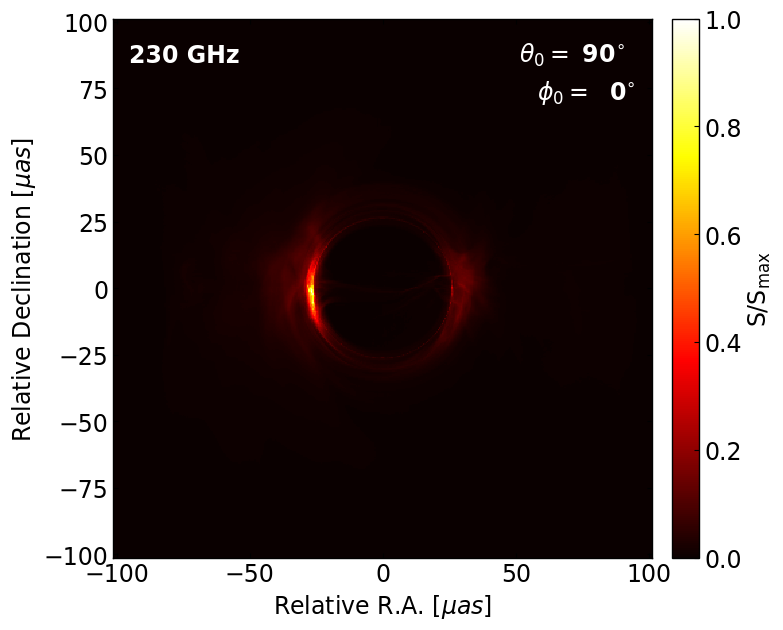

In [23]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [16]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name, ifreq=2):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==40) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

## Rhigh=1

In [2]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 10, 0, "MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.404714 at 9004.234232
98, flux: 2.304593 at 9014.746059
99, flux: 2.238956 at 9023.505435
100, flux: 2.147050 at 9034.016452
101, flux: 2.111593 at 9044.529609
102, flux: 2.105924 at 9053.290056
103, flux: 2.115942 at 9063.802536
104, flux: 2.118694 at 9074.314016
105, flux: 2.131697 at 9084.823874
106, flux: 2.123324 at 9093.581252
107, flux: 2.034592 at 9104.090482
108, flux: 2.013658 at 9114.601360
109, flux: 2.017349 at 9123.359993
110, flux: 2.012645 at 9133.870253
111, flux: 1.994801 at 9144.379583
112, flux: 2.012613 at 9154.889223
113, flux: 2.052952 at 9163.648327
114, flux: 2.098303 at 9174.157990
115, flux: 2.144294 at 9184.666192
116, flux: 2.202086 at 9193.424046
117, flux: 2.222527 at 9203.933544
118, flux: 2.239977 at 9214.444133
119, flux: 2.245603 at 9224.955775
120, flux: 2.251106 at 9233.717169
121, flux: 2.238453 at

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.030835 Jy, the density scale = 7.700000e-19


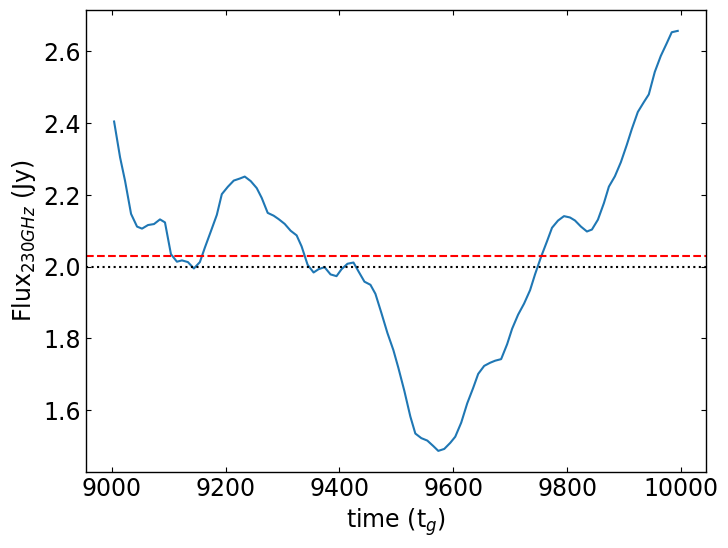

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [30]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc30/BHOSS_CODE
97, flux: 2.381622 at 9004.234232
98, flux: 2.301288 at 9014.746059
99, flux: 2.247866 at 9023.505435
100, flux: 2.173558 at 9034.016452
101, flux: 2.138215 at 9044.529609
102, flux: 2.125895 at 9053.290056
103, flux: 2.117921 at 9063.802536
104, flux: 2.099165 at 9074.314016
105, flux: 2.106117 at 9084.823874
106, flux: 2.096622 at 9093.581252
107, flux: 2.013917 at 9104.090482
108, flux: 1.985417 at 9114.601360
109, flux: 1.982994 at 9123.359993
110, flux: 1.967244 at 9133.870253
111, flux: 1.939746 at 9144.379583
112, flux: 1.956338 at 9154.889223
113, flux: 1.996953 at 9163.648327
114, flux: 2.043598 at 9174.157990
115, flux: 2.092237 at 9184.666192
116, flux: 2.166050 at 9193.424046
117, flux: 2.193351 at 9203.933544
118, flux: 2.222584 at 9214.444133
119, flux: 2.237431 at 9224.955775
120, flux: 2.249214 at 9233.717169
121, flux: 2.244863 at 9244.228854
122, flux: 2.241423 at 9254.740756
123, flux:

In [31]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [32]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.074892 Jy, the density scale = 7.400000e-19


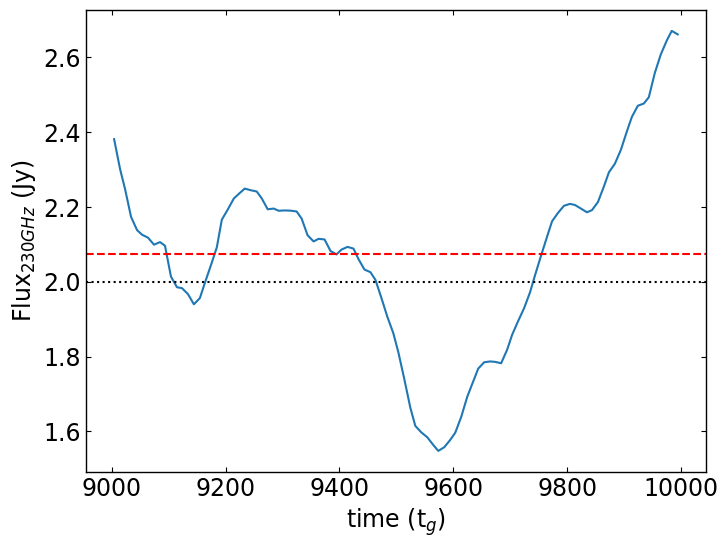

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [34]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.381622 Jy at 9004.234232
98:: 2.301288 Jy at 9014.746059
99:: 2.247866 Jy at 9023.505435
100:: 2.173558 Jy at 9034.016452
101:: 2.138215 Jy at 9044.529609
102:: 2.125895 Jy at 9053.290056
103:: 2.117921 Jy at 9063.802536
104:: 2.099165 Jy at 9074.314016
105:: 2.106117 Jy at 9084.823874
106:: 2.096622 Jy at 9093.581252
107:: 2.013917 Jy at 9104.090482
108:: 1.985417 Jy at 9114.601360
109:: 1.982994 Jy at 9123.359993
110:: 1.967244 Jy at 9133.870253
111:: 1.939746 Jy at 9144.379583
112:: 1.956338 Jy at 9154.889223
113:: 1.996953 Jy at 9163.648327
114:: 2.043598 Jy at 9174.157990
115:: 2.092237 Jy at 9184.666192
116:: 2.166050 Jy at 9193.424046
117:: 2.193351 Jy at 9203.933544
118:: 2.222584 Jy at 9214.444133
119:: 2.237431 Jy at 9224.955775
120:: 2.249214 Jy at 9233.717169
121:: 2.244863 Jy at 9244.228854
122:: 2.241423 Jy at 9254.740756
123:: 2.223186 Jy at 9263.502558
124:: 2.193876 Jy at 9274.015079
125:: 2.195812 Jy at 9284.527261
126:: 2.189897 Jy at 9293.287130
127:: 2.19081

In [6]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 50, 0, "MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.481678 at 9004.234232
98, flux: 2.416719 at 9014.746059
99, flux: 2.375724 at 9023.505435
100, flux: 2.313558 at 9034.016452
101, flux: 2.270890 at 9044.529609
102, flux: 2.241502 at 9053.290056
103, flux: 2.201793 at 9063.802536
104, flux: 2.162171 at 9074.314016
105, flux: 2.158811 at 9084.823874
106, flux: 2.140081 at 9093.581252
107, flux: 2.045116 at 9104.090482
108, flux: 1.994971 at 9114.601360
109, flux: 1.979023 at 9123.359993
110, flux: 1.950982 at 9133.870253
111, flux: 1.922831 at 9144.379583
112, flux: 1.943734 at 9154.889223
113, flux: 1.991636 at 9163.648327
114, flux: 2.050175 at 9174.157990
115, flux: 2.103733 at 9184.666192
116, flux: 2.195328 at 9193.424046
117, flux: 2.226166 at 9203.933544
118, flux: 2.264628 at 9214.444133
119, flux: 2.280305 at 9224.955775
120, flux: 2.294095 at 9233.717169
121, flux: 2.293449 at

In [7]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [8]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.159747 Jy, the density scale = 7.000000e-19


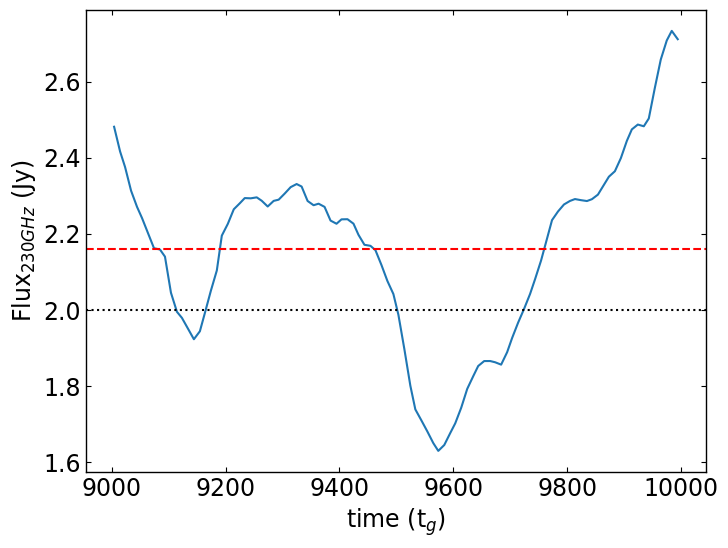

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [52]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc70/BHOSS_CODE
97, flux: 2.448882 at 9004.234232
98, flux: 2.382235 at 9014.746059
99, flux: 2.342581 at 9023.505435
100, flux: 2.303092 at 9034.016452
101, flux: 2.248967 at 9044.529609
102, flux: 2.172871 at 9053.290056
103, flux: 2.075514 at 9063.802536
104, flux: 2.028230 at 9074.314016
105, flux: 2.001464 at 9084.823874
106, flux: 1.942582 at 9093.581252
107, flux: 1.827870 at 9104.090482
108, flux: 1.769977 at 9114.601360
109, flux: 1.751200 at 9123.359993
110, flux: 1.722808 at 9133.870253
111, flux: 1.720350 at 9144.379583
112, flux: 1.769798 at 9154.889223
113, flux: 1.850767 at 9163.648327
114, flux: 1.883678 at 9174.157990
115, flux: 1.923637 at 9184.666192
116, flux: 2.068335 at 9193.424046
117, flux: 2.101317 at 9203.933544
118, flux: 2.147742 at 9214.444133
119, flux: 2.165039 at 9224.955775
120, flux: 2.171985 at 9233.717169
121, flux: 2.164564 at 9244.228854
122, flux: 2.170208 at 9254.740756
123, flux:

In [53]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [54]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.998874 Jy, the density scale = 6.100000e-19


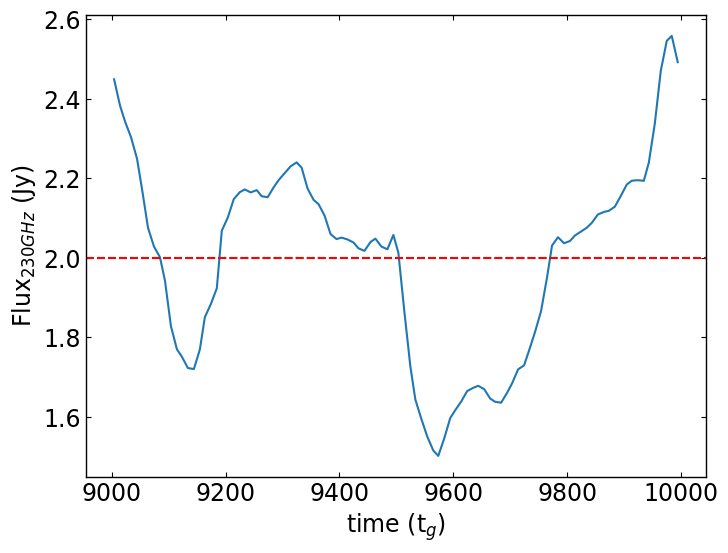

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [56]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.448882 Jy at 9004.234232
98:: 2.382235 Jy at 9014.746059
99:: 2.342581 Jy at 9023.505435
100:: 2.303092 Jy at 9034.016452
101:: 2.248967 Jy at 9044.529609
102:: 2.172871 Jy at 9053.290056
103:: 2.075514 Jy at 9063.802536
104:: 2.028230 Jy at 9074.314016
105:: 2.001464 Jy at 9084.823874
106:: 1.942582 Jy at 9093.581252
107:: 1.827870 Jy at 9104.090482
108:: 1.769977 Jy at 9114.601360
109:: 1.751200 Jy at 9123.359993
110:: 1.722808 Jy at 9133.870253
111:: 1.720350 Jy at 9144.379583
112:: 1.769798 Jy at 9154.889223
113:: 1.850767 Jy at 9163.648327
114:: 1.883678 Jy at 9174.157990
115:: 1.923637 Jy at 9184.666192
116:: 2.068335 Jy at 9193.424046
117:: 2.101317 Jy at 9203.933544
118:: 2.147742 Jy at 9214.444133
119:: 2.165039 Jy at 9224.955775
120:: 2.171985 Jy at 9233.717169
121:: 2.164564 Jy at 9244.228854
122:: 2.170208 Jy at 9254.740756
123:: 2.154805 Jy at 9263.502558
124:: 2.152400 Jy at 9274.015079
125:: 2.177394 Jy at 9284.527261
126:: 2.195473 Jy at 9293.287130
127:: 2.21296

In [10]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 90, 0, "MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.669575 at 9004.234232
98, flux: 2.613416 at 9014.746059
99, flux: 2.578267 at 9023.505435
100, flux: 2.542428 at 9034.016452
101, flux: 2.522041 at 9044.529609
102, flux: 2.442723 at 9053.290056
103, flux: 2.274660 at 9063.802536
104, flux: 2.311427 at 9074.314016
105, flux: 2.169037 at 9084.823874
106, flux: 2.180926 at 9093.581252
107, flux: 2.026707 at 9104.090482
108, flux: 2.038057 at 9114.601360
109, flux: 1.964726 at 9123.359993
110, flux: 1.912101 at 9133.870253
111, flux: 1.956449 at 9144.379583
112, flux: 2.087678 at 9154.889223
113, flux: 2.283841 at 9163.648327
114, flux: 2.317217 at 9174.157990
115, flux: 2.367115 at 9184.666192
116, flux: 2.694838 at 9193.424046
117, flux: 2.695217 at 9203.933544
118, flux: 2.714959 at 9214.444133
119, flux: 2.660477 at 9224.955775
120, flux: 2.677487 at 9233.717169
121, flux: 2.675036 at

In [11]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [12]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.179380 Jy, the density scale = 5.900000e-19


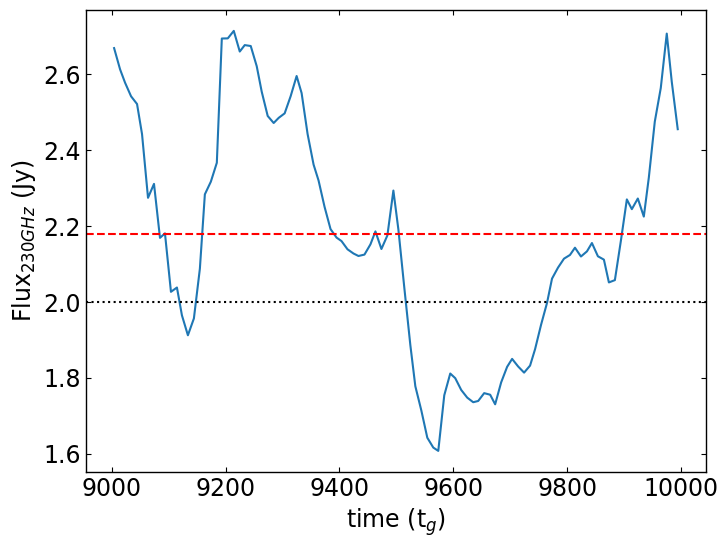

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [14]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.669575 Jy at 9004.234232
98:: 2.613416 Jy at 9014.746059
99:: 2.578267 Jy at 9023.505435
100:: 2.542428 Jy at 9034.016452
101:: 2.522041 Jy at 9044.529609
102:: 2.442723 Jy at 9053.290056
103:: 2.274660 Jy at 9063.802536
104:: 2.311427 Jy at 9074.314016
105:: 2.169037 Jy at 9084.823874
106:: 2.180926 Jy at 9093.581252
107:: 2.026707 Jy at 9104.090482
108:: 2.038057 Jy at 9114.601360
109:: 1.964726 Jy at 9123.359993
110:: 1.912101 Jy at 9133.870253
111:: 1.956449 Jy at 9144.379583
112:: 2.087678 Jy at 9154.889223
113:: 2.283841 Jy at 9163.648327
114:: 2.317217 Jy at 9174.157990
115:: 2.367115 Jy at 9184.666192
116:: 2.694838 Jy at 9193.424046
117:: 2.695217 Jy at 9203.933544
118:: 2.714959 Jy at 9214.444133
119:: 2.660477 Jy at 9224.955775
120:: 2.677487 Jy at 9233.717169
121:: 2.675036 Jy at 9244.228854
122:: 2.621823 Jy at 9254.740756
123:: 2.554586 Jy at 9263.502558
124:: 2.490543 Jy at 9274.015079
125:: 2.471978 Jy at 9284.527261
126:: 2.485500 Jy at 9293.287130
127:: 2.49743

## Rhigh=5

In [27]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc10/BHOSS_CODE
97, flux: 2.396445 at 9004.234232
98, flux: 2.329926 at 9014.746059
99, flux: 2.290846 at 9023.505435
100, flux: 2.229024 at 9034.016452
101, flux: 2.195296 at 9044.529609
102, flux: 2.176368 at 9053.290056
103, flux: 2.123863 at 9063.802536
104, flux: 2.102309 at 9074.314016
105, flux: 2.132624 at 9084.823874
106, flux: 2.160068 at 9093.581252
107, flux: 2.096588 at 9104.090482
108, flux: 2.078284 at 9114.601360
109, flux: 2.105944 at 9123.359993
110, flux: 2.133310 at 9133.870253
111, flux: 2.124793 at 9144.379583
112, flux: 2.117583 at 9154.889223
113, flux: 2.120534 at 9163.648327
114, flux: 2.113015 at 9174.157990
115, flux: 2.101477 at 9184.666192
116, flux: 2.118835 at 9193.424046
117, flux: 2.142670 at 9203.933544
118, flux: 2.175687 at 9214.444133
119, flux: 2.223682 at 9224.955775
120, flux: 2.254394 at 9233.717169
121, flux: 2.266141 at 9244.228854
122, flux: 2.272018 at 9254.740756
123, flux:

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.999949 Jy, the density scale = 1.250000e-18


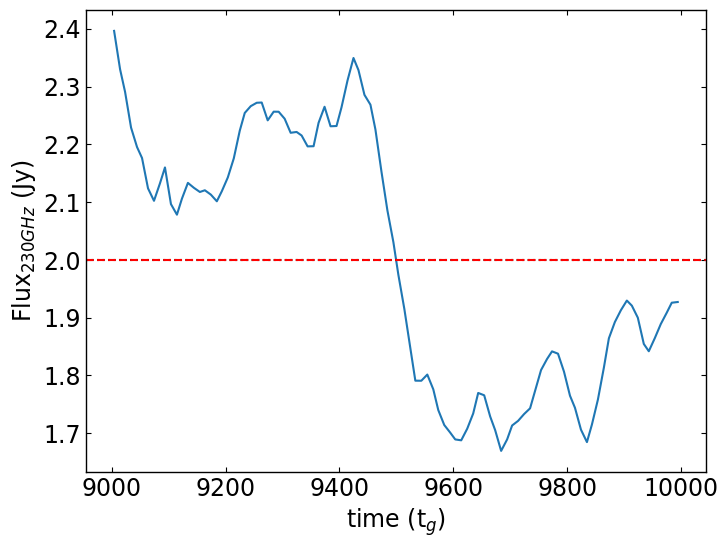

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.396445 Jy at 9004.234232
98:: 2.329926 Jy at 9014.746059
99:: 2.290846 Jy at 9023.505435
100:: 2.229024 Jy at 9034.016452
101:: 2.195296 Jy at 9044.529609
102:: 2.176368 Jy at 9053.290056
103:: 2.123863 Jy at 9063.802536
104:: 2.102309 Jy at 9074.314016
105:: 2.132624 Jy at 9084.823874
106:: 2.160068 Jy at 9093.581252
107:: 2.096588 Jy at 9104.090482
108:: 2.078284 Jy at 9114.601360
109:: 2.105944 Jy at 9123.359993
110:: 2.133310 Jy at 9133.870253
111:: 2.124793 Jy at 9144.379583
112:: 2.117583 Jy at 9154.889223
113:: 2.120534 Jy at 9163.648327
114:: 2.113015 Jy at 9174.157990
115:: 2.101477 Jy at 9184.666192
116:: 2.118835 Jy at 9193.424046
117:: 2.142670 Jy at 9203.933544
118:: 2.175687 Jy at 9214.444133
119:: 2.223682 Jy at 9224.955775
120:: 2.254394 Jy at 9233.717169
121:: 2.266141 Jy at 9244.228854
122:: 2.272018 Jy at 9254.740756
123:: 2.272439 Jy at 9263.502558
124:: 2.241582 Jy at 9274.015079
125:: 2.256603 Jy at 9284.527261
126:: 2.256467 Jy at 9293.287130
127:: 2.24437

In [32]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc30/BHOSS_CODE
97, flux: 2.345787 at 9004.234232
98, flux: 2.294652 at 9014.746059
99, flux: 2.256248 at 9023.505435
100, flux: 2.200319 at 9034.016452
101, flux: 2.168347 at 9044.529609
102, flux: 2.150211 at 9053.290056
103, flux: 2.094623 at 9063.802536
104, flux: 2.058362 at 9074.314016
105, flux: 2.076335 at 9084.823874
106, flux: 2.105498 at 9093.581252
107, flux: 2.065275 at 9104.090482
108, flux: 2.033962 at 9114.601360
109, flux: 2.050036 at 9123.359993
110, flux: 2.059222 at 9133.870253
111, flux: 2.042114 at 9144.379583
112, flux: 2.033392 at 9154.889223
113, flux: 2.035025 at 9163.648327
114, flux: 2.023442 at 9174.157990
115, flux: 2.004704 at 9184.666192
116, flux: 2.019672 at 9193.424046
117, flux: 2.038387 at 9203.933544
118, flux: 2.068096 at 9214.444133
119, flux: 2.115116 at 9224.955775
120, flux: 2.149522 at 9233.717169
121, flux: 2.172438 at 9244.228854
122, flux: 2.191456 at 9254.740756
123, flux:

In [33]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [34]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.943338 Jy, the density scale = 1.150000e-18


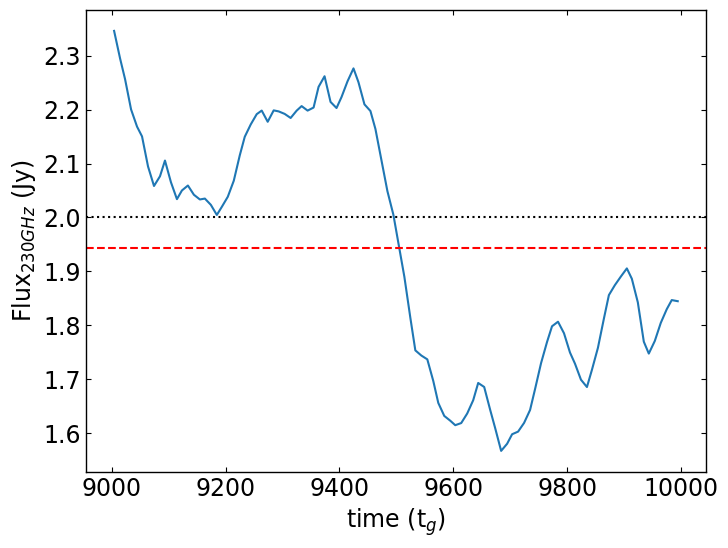

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [36]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.345787 Jy at 9004.234232
98:: 2.294652 Jy at 9014.746059
99:: 2.256248 Jy at 9023.505435
100:: 2.200319 Jy at 9034.016452
101:: 2.168347 Jy at 9044.529609
102:: 2.150211 Jy at 9053.290056
103:: 2.094623 Jy at 9063.802536
104:: 2.058362 Jy at 9074.314016
105:: 2.076335 Jy at 9084.823874
106:: 2.105498 Jy at 9093.581252
107:: 2.065275 Jy at 9104.090482
108:: 2.033962 Jy at 9114.601360
109:: 2.050036 Jy at 9123.359993
110:: 2.059222 Jy at 9133.870253
111:: 2.042114 Jy at 9144.379583
112:: 2.033392 Jy at 9154.889223
113:: 2.035025 Jy at 9163.648327
114:: 2.023442 Jy at 9174.157990
115:: 2.004704 Jy at 9184.666192
116:: 2.019672 Jy at 9193.424046
117:: 2.038387 Jy at 9203.933544
118:: 2.068096 Jy at 9214.444133
119:: 2.115116 Jy at 9224.955775
120:: 2.149522 Jy at 9233.717169
121:: 2.172438 Jy at 9244.228854
122:: 2.191456 Jy at 9254.740756
123:: 2.198119 Jy at 9263.502558
124:: 2.177345 Jy at 9274.015079
125:: 2.198471 Jy at 9284.527261
126:: 2.196582 Jy at 9293.287130
127:: 2.19195

In [59]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc50/BHOSS_CODE
97, flux: 2.547148 at 9004.234232
98, flux: 2.495636 at 9014.746059
99, flux: 2.453995 at 9023.505435
100, flux: 2.396280 at 9034.016452
101, flux: 2.357965 at 9044.529609
102, flux: 2.329803 at 9053.290056
103, flux: 2.250778 at 9063.802536
104, flux: 2.193800 at 9074.314016
105, flux: 2.194759 at 9084.823874
106, flux: 2.221227 at 9093.581252
107, flux: 2.177671 at 9104.090482
108, flux: 2.116350 at 9114.601360
109, flux: 2.116284 at 9123.359993
110, flux: 2.112592 at 9133.870253
111, flux: 2.098247 at 9144.379583
112, flux: 2.097251 at 9154.889223
113, flux: 2.101473 at 9163.648327
114, flux: 2.094803 at 9174.157990
115, flux: 2.062780 at 9184.666192
116, flux: 2.074315 at 9193.424046
117, flux: 2.091125 at 9203.933544
118, flux: 2.124371 at 9214.444133
119, flux: 2.168199 at 9224.955775
120, flux: 2.206307 at 9233.717169
121, flux: 2.231249 at 9244.228854
122, flux: 2.252516 at 9254.740756
123, flux:

In [60]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [61]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.037770 Jy, the density scale = 1.080000e-18


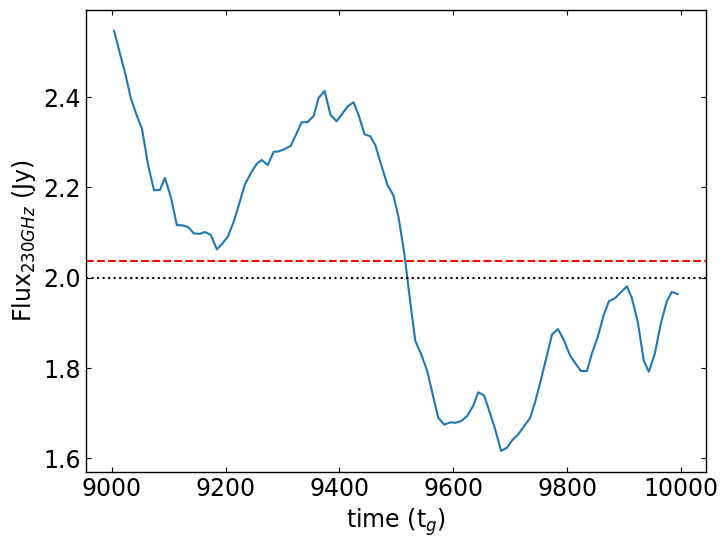

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [63]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.547148 Jy at 9004.234232
98:: 2.495636 Jy at 9014.746059
99:: 2.453995 Jy at 9023.505435
100:: 2.396280 Jy at 9034.016452
101:: 2.357965 Jy at 9044.529609
102:: 2.329803 Jy at 9053.290056
103:: 2.250778 Jy at 9063.802536
104:: 2.193800 Jy at 9074.314016
105:: 2.194759 Jy at 9084.823874
106:: 2.221227 Jy at 9093.581252
107:: 2.177671 Jy at 9104.090482
108:: 2.116350 Jy at 9114.601360
109:: 2.116284 Jy at 9123.359993
110:: 2.112592 Jy at 9133.870253
111:: 2.098247 Jy at 9144.379583
112:: 2.097251 Jy at 9154.889223
113:: 2.101473 Jy at 9163.648327
114:: 2.094803 Jy at 9174.157990
115:: 2.062780 Jy at 9184.666192
116:: 2.074315 Jy at 9193.424046
117:: 2.091125 Jy at 9203.933544
118:: 2.124371 Jy at 9214.444133
119:: 2.168199 Jy at 9224.955775
120:: 2.206307 Jy at 9233.717169
121:: 2.231249 Jy at 9244.228854
122:: 2.252516 Jy at 9254.740756
123:: 2.261120 Jy at 9263.502558
124:: 2.249744 Jy at 9274.015079
125:: 2.279178 Jy at 9284.527261
126:: 2.279979 Jy at 9293.287130
127:: 2.28511

In [64]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc70/BHOSS_CODE
97, flux: 2.634492 at 9004.234232
98, flux: 2.566031 at 9014.746059
99, flux: 2.508129 at 9023.505435
100, flux: 2.455352 at 9034.016452
101, flux: 2.398557 at 9044.529609
102, flux: 2.327812 at 9053.290056
103, flux: 2.207987 at 9063.802536
104, flux: 2.163927 at 9074.314016
105, flux: 2.151344 at 9084.823874
106, flux: 2.161455 at 9093.581252
107, flux: 2.103459 at 9104.090482
108, flux: 2.047741 at 9114.601360
109, flux: 2.049028 at 9123.359993
110, flux: 2.041550 at 9133.870253
111, flux: 2.058550 at 9144.379583
112, flux: 2.084474 at 9154.889223
113, flux: 2.096601 at 9163.648327
114, flux: 2.017409 at 9174.157990
115, flux: 1.947050 at 9184.666192
116, flux: 2.008585 at 9193.424046
117, flux: 2.060423 at 9203.933544
118, flux: 2.107573 at 9214.444133
119, flux: 2.163426 at 9224.955775
120, flux: 2.196748 at 9233.717169
121, flux: 2.204552 at 9244.228854
122, flux: 2.219380 at 9254.740756
123, flux:

In [65]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [66]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.989109 Jy, the density scale = 9.750000e-19


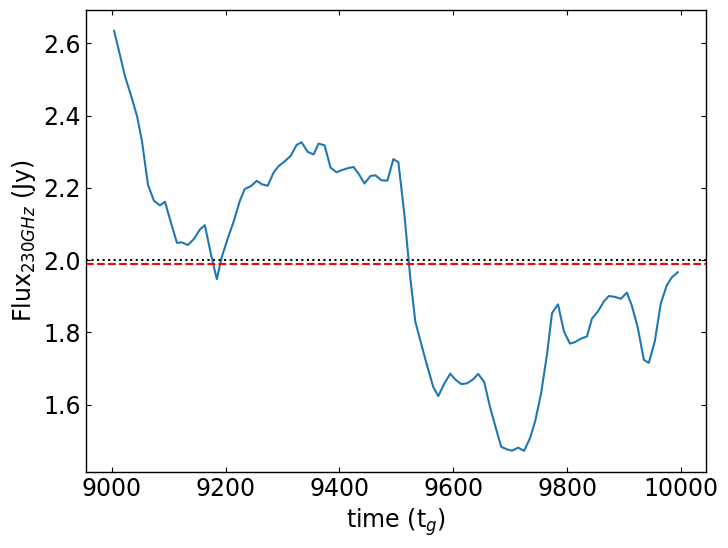

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [68]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.634492 Jy at 9004.234232
98:: 2.566031 Jy at 9014.746059
99:: 2.508129 Jy at 9023.505435
100:: 2.455352 Jy at 9034.016452
101:: 2.398557 Jy at 9044.529609
102:: 2.327812 Jy at 9053.290056
103:: 2.207987 Jy at 9063.802536
104:: 2.163927 Jy at 9074.314016
105:: 2.151344 Jy at 9084.823874
106:: 2.161455 Jy at 9093.581252
107:: 2.103459 Jy at 9104.090482
108:: 2.047741 Jy at 9114.601360
109:: 2.049028 Jy at 9123.359993
110:: 2.041550 Jy at 9133.870253
111:: 2.058550 Jy at 9144.379583
112:: 2.084474 Jy at 9154.889223
113:: 2.096601 Jy at 9163.648327
114:: 2.017409 Jy at 9174.157990
115:: 1.947050 Jy at 9184.666192
116:: 2.008585 Jy at 9193.424046
117:: 2.060423 Jy at 9203.933544
118:: 2.107573 Jy at 9214.444133
119:: 2.163426 Jy at 9224.955775
120:: 2.196748 Jy at 9233.717169
121:: 2.204552 Jy at 9244.228854
122:: 2.219380 Jy at 9254.740756
123:: 2.210105 Jy at 9263.502558
124:: 2.205632 Jy at 9274.015079
125:: 2.242787 Jy at 9284.527261
126:: 2.260173 Jy at 9293.287130
127:: 2.27336

In [69]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc90/BHOSS_CODE
97, flux: 2.524147 at 9004.234232
98, flux: 2.491759 at 9014.746059
99, flux: 2.435784 at 9023.505435
100, flux: 2.361782 at 9034.016452
101, flux: 2.291881 at 9044.529609
102, flux: 2.239339 at 9053.290056
103, flux: 2.137583 at 9063.802536
104, flux: 2.211047 at 9074.314016
105, flux: 2.078378 at 9084.823874
106, flux: 2.282923 at 9093.581252
107, flux: 2.201737 at 9104.090482
108, flux: 2.262260 at 9114.601360
109, flux: 2.210610 at 9123.359993
110, flux: 2.173508 at 9133.870253
111, flux: 2.254498 at 9144.379583
112, flux: 2.309202 at 9154.889223
113, flux: 2.347154 at 9163.648327
114, flux: 2.129097 at 9174.157990
115, flux: 2.030409 at 9184.666192
116, flux: 2.214848 at 9193.424046
117, flux: 2.301751 at 9203.933544
118, flux: 2.312607 at 9214.444133
119, flux: 2.347938 at 9224.955775
120, flux: 2.396005 at 9233.717169
121, flux: 2.414756 at 9244.228854
122, flux: 2.380647 at 9254.740756
123, flux:

In [70]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [71]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.968358 Jy, the density scale = 9.150000e-19


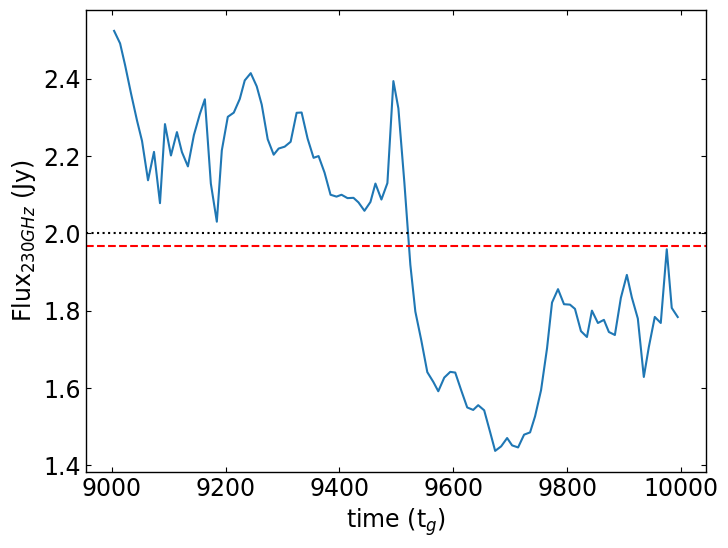

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [73]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.524147 Jy at 9004.234232
98:: 2.491759 Jy at 9014.746059
99:: 2.435784 Jy at 9023.505435
100:: 2.361782 Jy at 9034.016452
101:: 2.291881 Jy at 9044.529609
102:: 2.239339 Jy at 9053.290056
103:: 2.137583 Jy at 9063.802536
104:: 2.211047 Jy at 9074.314016
105:: 2.078378 Jy at 9084.823874
106:: 2.282923 Jy at 9093.581252
107:: 2.201737 Jy at 9104.090482
108:: 2.262260 Jy at 9114.601360
109:: 2.210610 Jy at 9123.359993
110:: 2.173508 Jy at 9133.870253
111:: 2.254498 Jy at 9144.379583
112:: 2.309202 Jy at 9154.889223
113:: 2.347154 Jy at 9163.648327
114:: 2.129097 Jy at 9174.157990
115:: 2.030409 Jy at 9184.666192
116:: 2.214848 Jy at 9193.424046
117:: 2.301751 Jy at 9203.933544
118:: 2.312607 Jy at 9214.444133
119:: 2.347938 Jy at 9224.955775
120:: 2.396005 Jy at 9233.717169
121:: 2.414756 Jy at 9244.228854
122:: 2.380647 Jy at 9254.740756
123:: 2.333436 Jy at 9263.502558
124:: 2.243788 Jy at 9274.015079
125:: 2.203780 Jy at 9284.527261
126:: 2.219715 Jy at 9293.287130
127:: 2.22451

## Rhigh=10

In [29]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc10/BHOSS_CODE
97, flux: 2.468273 at 9004.234232
98, flux: 2.409724 at 9014.746059
99, flux: 2.368740 at 9023.505435
100, flux: 2.297008 at 9034.016452
101, flux: 2.251035 at 9044.529609
102, flux: 2.224029 at 9053.290056
103, flux: 2.149964 at 9063.802536
104, flux: 2.110720 at 9074.314016
105, flux: 2.116723 at 9084.823874
106, flux: 2.135979 at 9093.581252
107, flux: 2.112079 at 9104.090482
108, flux: 2.090530 at 9114.601360
109, flux: 2.116007 at 9123.359993
110, flux: 2.156906 at 9133.870253
111, flux: 2.166869 at 9144.379583
112, flux: 2.165569 at 9154.889223
113, flux: 2.157640 at 9163.648327
114, flux: 2.142434 at 9174.157990
115, flux: 2.107991 at 9184.666192
116, flux: 2.100173 at 9193.424046
117, flux: 2.114937 at 9203.933544
118, flux: 2.147529 at 9214.444133
119, flux: 2.196516 at 9224.955775
120, flux: 2.228514 at 9233.717169
121, flux: 2.254373 at 9244.228854
122, flux: 2.266049 at 9254.740756
123, flux

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.014853 Jy, the density scale = 1.560000e-18


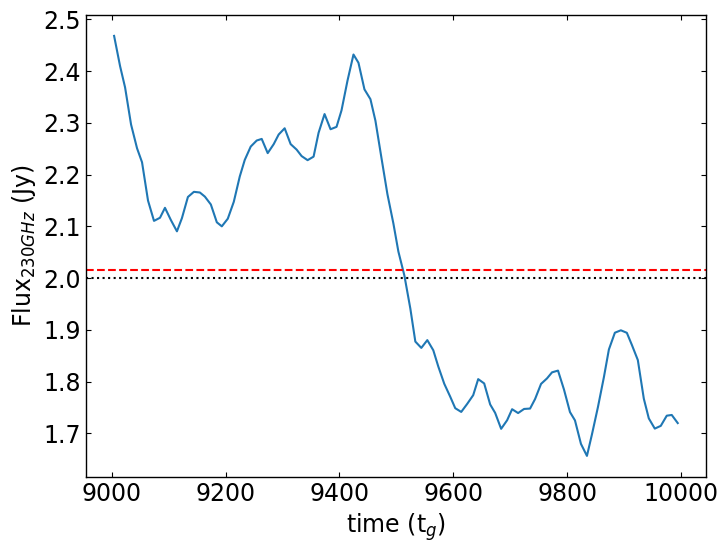

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [33]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.468273 Jy at 9004.234232
98:: 2.409724 Jy at 9014.746059
99:: 2.368740 Jy at 9023.505435
100:: 2.297008 Jy at 9034.016452
101:: 2.251035 Jy at 9044.529609
102:: 2.224029 Jy at 9053.290056
103:: 2.149964 Jy at 9063.802536
104:: 2.110720 Jy at 9074.314016
105:: 2.116723 Jy at 9084.823874
106:: 2.135979 Jy at 9093.581252
107:: 2.112079 Jy at 9104.090482
108:: 2.090530 Jy at 9114.601360
109:: 2.116007 Jy at 9123.359993
110:: 2.156906 Jy at 9133.870253
111:: 2.166869 Jy at 9144.379583
112:: 2.165569 Jy at 9154.889223
113:: 2.157640 Jy at 9163.648327
114:: 2.142434 Jy at 9174.157990
115:: 2.107991 Jy at 9184.666192
116:: 2.100173 Jy at 9193.424046
117:: 2.114937 Jy at 9203.933544
118:: 2.147529 Jy at 9214.444133
119:: 2.196516 Jy at 9224.955775
120:: 2.228514 Jy at 9233.717169
121:: 2.254373 Jy at 9244.228854
122:: 2.266049 Jy at 9254.740756
123:: 2.269138 Jy at 9263.502558
124:: 2.241675 Jy at 9274.015079
125:: 2.258913 Jy at 9284.527261
126:: 2.277614 Jy at 9293.287130
127:: 2.28969

In [34]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc30/BHOSS_CODE
97, flux: 2.514200 at 9004.234232
98, flux: 2.463211 at 9014.746059
99, flux: 2.418166 at 9023.505435
100, flux: 2.347717 at 9034.016452
101, flux: 2.299559 at 9044.529609
102, flux: 2.273356 at 9053.290056
103, flux: 2.199260 at 9063.802536
104, flux: 2.144609 at 9074.314016
105, flux: 2.136235 at 9084.823874
106, flux: 2.156797 at 9093.581252
107, flux: 2.159357 at 9104.090482
108, flux: 2.125941 at 9114.601360
109, flux: 2.136956 at 9123.359993
110, flux: 2.156750 at 9133.870253
111, flux: 2.158968 at 9144.379583
112, flux: 2.152381 at 9154.889223
113, flux: 2.141994 at 9163.648327
114, flux: 2.117329 at 9174.157990
115, flux: 2.069338 at 9184.666192
116, flux: 2.050683 at 9193.424046
117, flux: 2.055539 at 9203.933544
118, flux: 2.077968 at 9214.444133
119, flux: 2.122542 at 9224.955775
120, flux: 2.158044 at 9233.717169
121, flux: 2.196288 at 9244.228854
122, flux: 2.221353 at 9254.740756
123, flux

In [35]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [36]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.006956 Jy, the density scale = 1.450000e-18


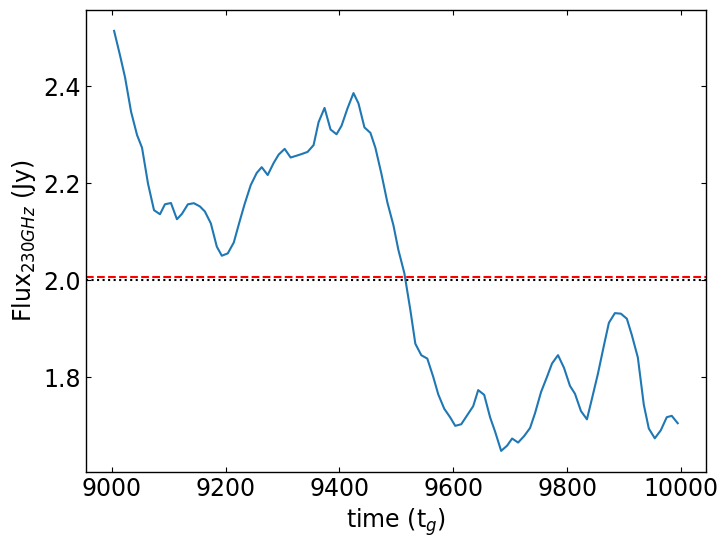

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [38]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.514200 Jy at 9004.234232
98:: 2.463211 Jy at 9014.746059
99:: 2.418166 Jy at 9023.505435
100:: 2.347717 Jy at 9034.016452
101:: 2.299559 Jy at 9044.529609
102:: 2.273356 Jy at 9053.290056
103:: 2.199260 Jy at 9063.802536
104:: 2.144609 Jy at 9074.314016
105:: 2.136235 Jy at 9084.823874
106:: 2.156797 Jy at 9093.581252
107:: 2.159357 Jy at 9104.090482
108:: 2.125941 Jy at 9114.601360
109:: 2.136956 Jy at 9123.359993
110:: 2.156750 Jy at 9133.870253
111:: 2.158968 Jy at 9144.379583
112:: 2.152381 Jy at 9154.889223
113:: 2.141994 Jy at 9163.648327
114:: 2.117329 Jy at 9174.157990
115:: 2.069338 Jy at 9184.666192
116:: 2.050683 Jy at 9193.424046
117:: 2.055539 Jy at 9203.933544
118:: 2.077968 Jy at 9214.444133
119:: 2.122542 Jy at 9224.955775
120:: 2.158044 Jy at 9233.717169
121:: 2.196288 Jy at 9244.228854
122:: 2.221353 Jy at 9254.740756
123:: 2.233244 Jy at 9263.502558
124:: 2.217039 Jy at 9274.015079
125:: 2.242051 Jy at 9284.527261
126:: 2.259157 Jy at 9293.287130
127:: 2.27093

In [39]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc50/BHOSS_CODE
97, flux: 2.539217 at 9004.234232
98, flux: 2.483534 at 9014.746059
99, flux: 2.434150 at 9023.505435
100, flux: 2.363617 at 9034.016452
101, flux: 2.313275 at 9044.529609
102, flux: 2.282168 at 9053.290056
103, flux: 2.194123 at 9063.802536
104, flux: 2.118898 at 9074.314016
105, flux: 2.091420 at 9084.823874
106, flux: 2.108952 at 9093.581252
107, flux: 2.113825 at 9104.090482
108, flux: 2.055085 at 9114.601360
109, flux: 2.051823 at 9123.359993
110, flux: 2.059236 at 9133.870253
111, flux: 2.069733 at 9144.379583
112, flux: 2.070069 at 9154.889223
113, flux: 2.061525 at 9163.648327
114, flux: 2.037625 at 9174.157990
115, flux: 1.969889 at 9184.666192
116, flux: 1.935737 at 9193.424046
117, flux: 1.935940 at 9203.933544
118, flux: 1.958493 at 9214.444133
119, flux: 1.997584 at 9224.955775
120, flux: 2.036607 at 9233.717169
121, flux: 2.072653 at 9244.228854
122, flux: 2.099685 at 9254.740756
123, flux

In [40]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [41]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.947129 Jy, the density scale = 1.300000e-18


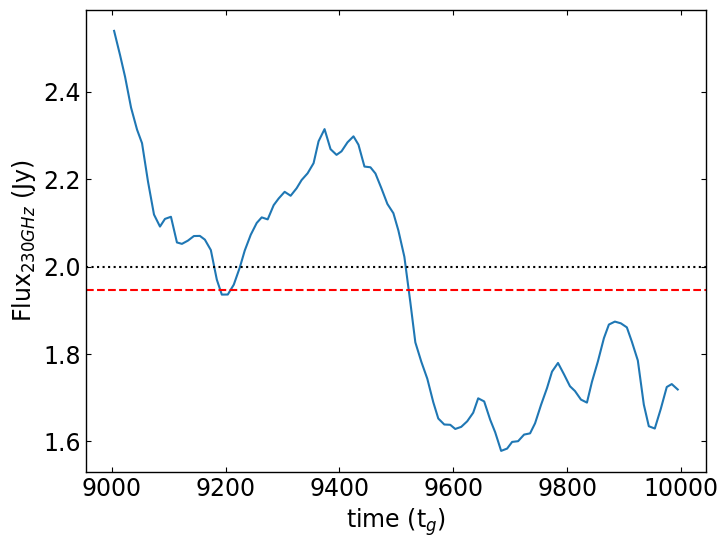

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [43]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.539217 Jy at 9004.234232
98:: 2.483534 Jy at 9014.746059
99:: 2.434150 Jy at 9023.505435
100:: 2.363617 Jy at 9034.016452
101:: 2.313275 Jy at 9044.529609
102:: 2.282168 Jy at 9053.290056
103:: 2.194123 Jy at 9063.802536
104:: 2.118898 Jy at 9074.314016
105:: 2.091420 Jy at 9084.823874
106:: 2.108952 Jy at 9093.581252
107:: 2.113825 Jy at 9104.090482
108:: 2.055085 Jy at 9114.601360
109:: 2.051823 Jy at 9123.359993
110:: 2.059236 Jy at 9133.870253
111:: 2.069733 Jy at 9144.379583
112:: 2.070069 Jy at 9154.889223
113:: 2.061525 Jy at 9163.648327
114:: 2.037625 Jy at 9174.157990
115:: 1.969889 Jy at 9184.666192
116:: 1.935737 Jy at 9193.424046
117:: 1.935940 Jy at 9203.933544
118:: 1.958493 Jy at 9214.444133
119:: 1.997584 Jy at 9224.955775
120:: 2.036607 Jy at 9233.717169
121:: 2.072653 Jy at 9244.228854
122:: 2.099685 Jy at 9254.740756
123:: 2.112444 Jy at 9263.502558
124:: 2.107879 Jy at 9274.015079
125:: 2.140400 Jy at 9284.527261
126:: 2.155707 Jy at 9293.287130
127:: 2.17096

In [56]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc70/BHOSS_CODE
97, flux: 2.642776 at 9004.234232
98, flux: 2.575747 at 9014.746059
99, flux: 2.510220 at 9023.505435
100, flux: 2.438696 at 9034.016452
101, flux: 2.369419 at 9044.529609
102, flux: 2.300488 at 9053.290056
103, flux: 2.186104 at 9063.802536
104, flux: 2.130129 at 9074.314016
105, flux: 2.105372 at 9084.823874
106, flux: 2.112520 at 9093.581252
107, flux: 2.107840 at 9104.090482
108, flux: 2.062770 at 9114.601360
109, flux: 2.062909 at 9123.359993
110, flux: 2.062991 at 9133.870253
111, flux: 2.107637 at 9144.379583
112, flux: 2.120867 at 9154.889223
113, flux: 2.101508 at 9163.648327
114, flux: 1.978885 at 9174.157990
115, flux: 1.869871 at 9184.666192
116, flux: 1.881752 at 9193.424046
117, flux: 1.929786 at 9203.933544
118, flux: 1.973979 at 9214.444133
119, flux: 2.041085 at 9224.955775
120, flux: 2.080527 at 9233.717169
121, flux: 2.097410 at 9244.228854
122, flux: 2.119522 at 9254.740756
123, flux

In [57]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [58]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.954408 Jy, the density scale = 1.200000e-18


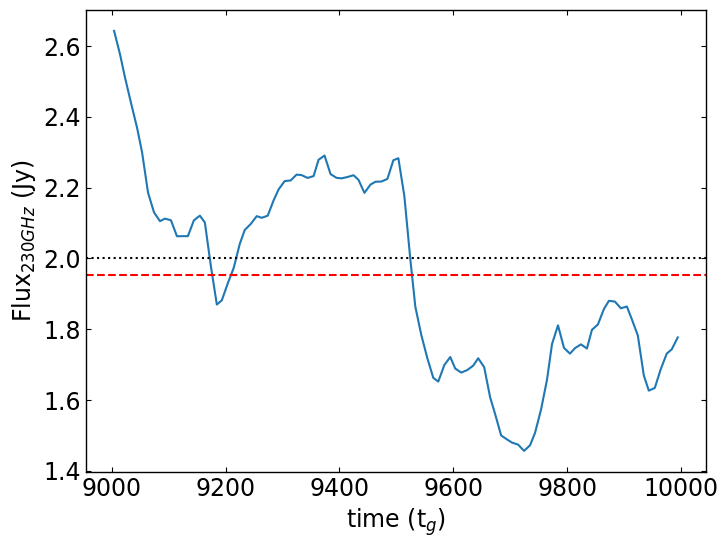

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [60]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.642776 Jy at 9004.234232
98:: 2.575747 Jy at 9014.746059
99:: 2.510220 Jy at 9023.505435
100:: 2.438696 Jy at 9034.016452
101:: 2.369419 Jy at 9044.529609
102:: 2.300488 Jy at 9053.290056
103:: 2.186104 Jy at 9063.802536
104:: 2.130129 Jy at 9074.314016
105:: 2.105372 Jy at 9084.823874
106:: 2.112520 Jy at 9093.581252
107:: 2.107840 Jy at 9104.090482
108:: 2.062770 Jy at 9114.601360
109:: 2.062909 Jy at 9123.359993
110:: 2.062991 Jy at 9133.870253
111:: 2.107637 Jy at 9144.379583
112:: 2.120867 Jy at 9154.889223
113:: 2.101508 Jy at 9163.648327
114:: 1.978885 Jy at 9174.157990
115:: 1.869871 Jy at 9184.666192
116:: 1.881752 Jy at 9193.424046
117:: 1.929786 Jy at 9203.933544
118:: 1.973979 Jy at 9214.444133
119:: 2.041085 Jy at 9224.955775
120:: 2.080527 Jy at 9233.717169
121:: 2.097410 Jy at 9244.228854
122:: 2.119522 Jy at 9254.740756
123:: 2.114868 Jy at 9263.502558
124:: 2.120764 Jy at 9274.015079
125:: 2.164699 Jy at 9284.527261
126:: 2.195328 Jy at 9293.287130
127:: 2.21852

In [61]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc90/BHOSS_CODE
97, flux: 2.519616 at 9004.234232
98, flux: 2.506691 at 9014.746059
99, flux: 2.444069 at 9023.505435
100, flux: 2.346484 at 9034.016452
101, flux: 2.277068 at 9044.529609
102, flux: 2.234004 at 9053.290056
103, flux: 2.150949 at 9063.802536
104, flux: 2.190735 at 9074.314016
105, flux: 2.044406 at 9084.823874
106, flux: 2.240413 at 9093.581252
107, flux: 2.224105 at 9104.090482
108, flux: 2.288327 at 9114.601360
109, flux: 2.248774 at 9123.359993
110, flux: 2.231465 at 9133.870253
111, flux: 2.347358 at 9144.379583
112, flux: 2.345988 at 9154.889223
113, flux: 2.341501 at 9163.648327
114, flux: 2.050998 at 9174.157990
115, flux: 1.900623 at 9184.666192
116, flux: 1.994877 at 9193.424046
117, flux: 2.099335 at 9203.933544
118, flux: 2.131721 at 9214.444133
119, flux: 2.203408 at 9224.955775
120, flux: 2.254144 at 9233.717169
121, flux: 2.275771 at 9244.228854
122, flux: 2.263256 at 9254.740756
123, flux

In [62]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [63]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.948849 Jy, the density scale = 1.150000e-18


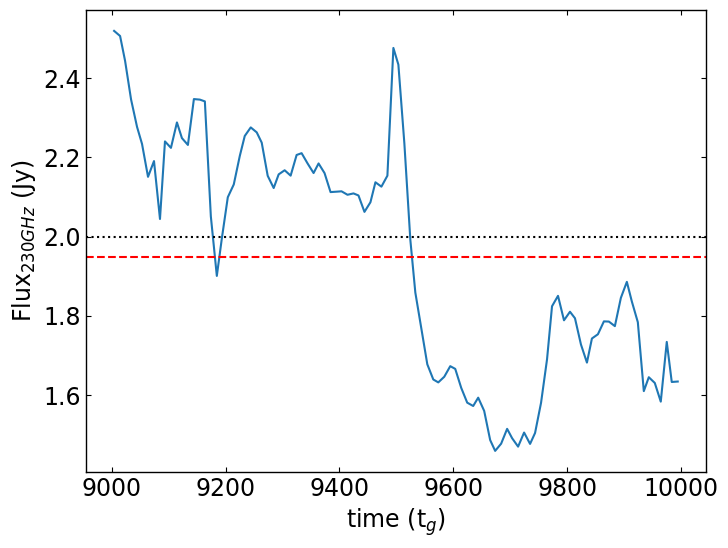

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [65]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.519616 Jy at 9004.234232
98:: 2.506691 Jy at 9014.746059
99:: 2.444069 Jy at 9023.505435
100:: 2.346484 Jy at 9034.016452
101:: 2.277068 Jy at 9044.529609
102:: 2.234004 Jy at 9053.290056
103:: 2.150949 Jy at 9063.802536
104:: 2.190735 Jy at 9074.314016
105:: 2.044406 Jy at 9084.823874
106:: 2.240413 Jy at 9093.581252
107:: 2.224105 Jy at 9104.090482
108:: 2.288327 Jy at 9114.601360
109:: 2.248774 Jy at 9123.359993
110:: 2.231465 Jy at 9133.870253
111:: 2.347358 Jy at 9144.379583
112:: 2.345988 Jy at 9154.889223
113:: 2.341501 Jy at 9163.648327
114:: 2.050998 Jy at 9174.157990
115:: 1.900623 Jy at 9184.666192
116:: 1.994877 Jy at 9193.424046
117:: 2.099335 Jy at 9203.933544
118:: 2.131721 Jy at 9214.444133
119:: 2.203408 Jy at 9224.955775
120:: 2.254144 Jy at 9233.717169
121:: 2.275771 Jy at 9244.228854
122:: 2.263256 Jy at 9254.740756
123:: 2.237331 Jy at 9263.502558
124:: 2.153555 Jy at 9274.015079
125:: 2.122660 Jy at 9284.527261
126:: 2.157129 Jy at 9293.287130
127:: 2.16753

## Rhigh=20

In [5]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc10/BHOSS_CODE
97, flux: 2.485324 at 9004.234232
98, flux: 2.434260 at 9014.746059
99, flux: 2.393264 at 9023.505435
100, flux: 2.308915 at 9034.016452
101, flux: 2.248193 at 9044.529609
102, flux: 2.211425 at 9053.290056
103, flux: 2.129988 at 9063.802536
104, flux: 2.077900 at 9074.314016
105, flux: 2.073659 at 9084.823874
106, flux: 2.074193 at 9093.581252
107, flux: 2.078365 at 9104.090482
108, flux: 2.065222 at 9114.601360
109, flux: 2.072675 at 9123.359993
110, flux: 2.109970 at 9133.870253
111, flux: 2.128069 at 9144.379583
112, flux: 2.136507 at 9154.889223
113, flux: 2.129220 at 9163.648327
114, flux: 2.117013 at 9174.157990
115, flux: 2.075972 at 9184.666192
116, flux: 2.066484 at 9193.424046
117, flux: 2.068924 at 9203.933544
118, flux: 2.103741 at 9214.444133
119, flux: 2.142873 at 9224.955775
120, flux: 2.165935 at 9233.717169
121, flux: 2.193572 at 9244.228854
122, flux: 2.208250 at 9254.740756
123, flux

In [6]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [7]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.996711 Jy, the density scale = 1.930000e-18


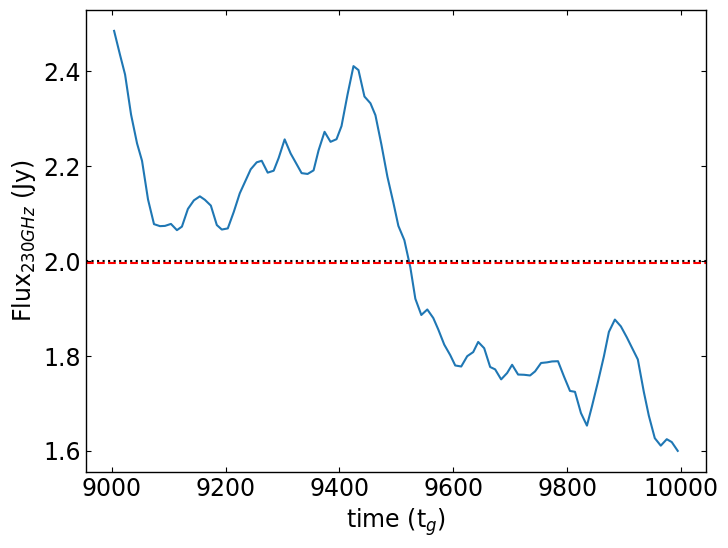

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [9]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.485324 Jy at 9004.234232
98:: 2.434260 Jy at 9014.746059
99:: 2.393264 Jy at 9023.505435
100:: 2.308915 Jy at 9034.016452
101:: 2.248193 Jy at 9044.529609
102:: 2.211425 Jy at 9053.290056
103:: 2.129988 Jy at 9063.802536
104:: 2.077900 Jy at 9074.314016
105:: 2.073659 Jy at 9084.823874
106:: 2.074193 Jy at 9093.581252
107:: 2.078365 Jy at 9104.090482
108:: 2.065222 Jy at 9114.601360
109:: 2.072675 Jy at 9123.359993
110:: 2.109970 Jy at 9133.870253
111:: 2.128069 Jy at 9144.379583
112:: 2.136507 Jy at 9154.889223
113:: 2.129220 Jy at 9163.648327
114:: 2.117013 Jy at 9174.157990
115:: 2.075972 Jy at 9184.666192
116:: 2.066484 Jy at 9193.424046
117:: 2.068924 Jy at 9203.933544
118:: 2.103741 Jy at 9214.444133
119:: 2.142873 Jy at 9224.955775
120:: 2.165935 Jy at 9233.717169
121:: 2.193572 Jy at 9244.228854
122:: 2.208250 Jy at 9254.740756
123:: 2.211487 Jy at 9263.502558
124:: 2.186470 Jy at 9274.015079
125:: 2.190534 Jy at 9284.527261
126:: 2.217438 Jy at 9293.287130
127:: 2.25657

In [19]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc30/BHOSS_CODE
97, flux: 2.667980 at 9004.234232
98, flux: 2.616381 at 9014.746059
99, flux: 2.570410 at 9023.505435
100, flux: 2.484696 at 9034.016452
101, flux: 2.414995 at 9044.529609
102, flux: 2.374247 at 9053.290056
103, flux: 2.288226 at 9063.802536
104, flux: 2.215351 at 9074.314016
105, flux: 2.194703 at 9084.823874
106, flux: 2.193710 at 9093.581252
107, flux: 2.225936 at 9104.090482
108, flux: 2.204953 at 9114.601360
109, flux: 2.196400 at 9123.359993
110, flux: 2.211189 at 9133.870253
111, flux: 2.226532 at 9144.379583
112, flux: 2.228343 at 9154.889223
113, flux: 2.218243 at 9163.648327
114, flux: 2.193496 at 9174.157990
115, flux: 2.132833 at 9184.666192
116, flux: 2.107905 at 9193.424046
117, flux: 2.094131 at 9203.933544
118, flux: 2.112306 at 9214.444133
119, flux: 2.142996 at 9224.955775
120, flux: 2.169020 at 9233.717169
121, flux: 2.207563 at 9244.228854
122, flux: 2.235472 at 9254.740756
123, flux

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.068152 Jy, the density scale = 1.830000e-18


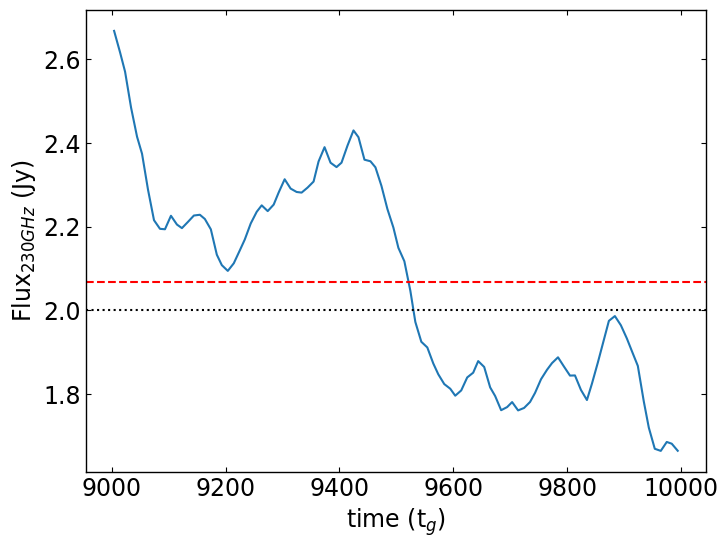

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [23]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.667980 Jy at 9004.234232
98:: 2.616381 Jy at 9014.746059
99:: 2.570410 Jy at 9023.505435
100:: 2.484696 Jy at 9034.016452
101:: 2.414995 Jy at 9044.529609
102:: 2.374247 Jy at 9053.290056
103:: 2.288226 Jy at 9063.802536
104:: 2.215351 Jy at 9074.314016
105:: 2.194703 Jy at 9084.823874
106:: 2.193710 Jy at 9093.581252
107:: 2.225936 Jy at 9104.090482
108:: 2.204953 Jy at 9114.601360
109:: 2.196400 Jy at 9123.359993
110:: 2.211189 Jy at 9133.870253
111:: 2.226532 Jy at 9144.379583
112:: 2.228343 Jy at 9154.889223
113:: 2.218243 Jy at 9163.648327
114:: 2.193496 Jy at 9174.157990
115:: 2.132833 Jy at 9184.666192
116:: 2.107905 Jy at 9193.424046
117:: 2.094131 Jy at 9203.933544
118:: 2.112306 Jy at 9214.444133
119:: 2.142996 Jy at 9224.955775
120:: 2.169020 Jy at 9233.717169
121:: 2.207563 Jy at 9244.228854
122:: 2.235472 Jy at 9254.740756
123:: 2.250867 Jy at 9263.502558
124:: 2.237096 Jy at 9274.015079
125:: 2.252593 Jy at 9284.527261
126:: 2.281587 Jy at 9293.287130
127:: 2.31323

In [24]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc50/BHOSS_CODE
97, flux: 2.787994 at 9004.234232
98, flux: 2.722961 at 9014.746059
99, flux: 2.669608 at 9023.505435
100, flux: 2.580644 at 9034.016452
101, flux: 2.504177 at 9044.529609
102, flux: 2.454984 at 9053.290056
103, flux: 2.352800 at 9063.802536
104, flux: 2.251147 at 9074.314016
105, flux: 2.207493 at 9084.823874
106, flux: 2.205134 at 9093.581252
107, flux: 2.243147 at 9104.090482
108, flux: 2.197291 at 9114.601360
109, flux: 2.177143 at 9123.359993
110, flux: 2.182607 at 9133.870253
111, flux: 2.214701 at 9144.379583
112, flux: 2.221716 at 9154.889223
113, flux: 2.213549 at 9163.648327
114, flux: 2.188028 at 9174.157990
115, flux: 2.094736 at 9184.666192
116, flux: 2.042631 at 9193.424046
117, flux: 2.021591 at 9203.933544
118, flux: 2.036007 at 9214.444133
119, flux: 2.060759 at 9224.955775
120, flux: 2.090862 at 9233.717169
121, flux: 2.125845 at 9244.228854
122, flux: 2.158591 at 9254.740756
123, flux

In [25]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [26]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.067856 Jy, the density scale = 1.670000e-18


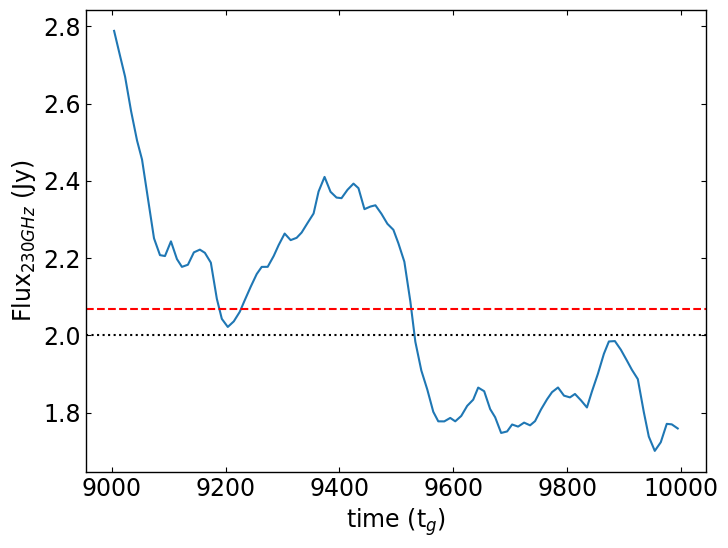

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [28]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.787994 Jy at 9004.234232
98:: 2.722961 Jy at 9014.746059
99:: 2.669608 Jy at 9023.505435
100:: 2.580644 Jy at 9034.016452
101:: 2.504177 Jy at 9044.529609
102:: 2.454984 Jy at 9053.290056
103:: 2.352800 Jy at 9063.802536
104:: 2.251147 Jy at 9074.314016
105:: 2.207493 Jy at 9084.823874
106:: 2.205134 Jy at 9093.581252
107:: 2.243147 Jy at 9104.090482
108:: 2.197291 Jy at 9114.601360
109:: 2.177143 Jy at 9123.359993
110:: 2.182607 Jy at 9133.870253
111:: 2.214701 Jy at 9144.379583
112:: 2.221716 Jy at 9154.889223
113:: 2.213549 Jy at 9163.648327
114:: 2.188028 Jy at 9174.157990
115:: 2.094736 Jy at 9184.666192
116:: 2.042631 Jy at 9193.424046
117:: 2.021591 Jy at 9203.933544
118:: 2.036007 Jy at 9214.444133
119:: 2.060759 Jy at 9224.955775
120:: 2.090862 Jy at 9233.717169
121:: 2.125845 Jy at 9244.228854
122:: 2.158591 Jy at 9254.740756
123:: 2.177047 Jy at 9263.502558
124:: 2.177228 Jy at 9274.015079
125:: 2.205179 Jy at 9284.527261
126:: 2.233594 Jy at 9293.287130
127:: 2.26332

In [29]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc70/BHOSS_CODE
97, flux: 2.760849 at 9004.234232
98, flux: 2.696011 at 9014.746059
99, flux: 2.640327 at 9023.505435
100, flux: 2.546665 at 9034.016452
101, flux: 2.455373 at 9044.529609
102, flux: 2.376131 at 9053.290056
103, flux: 2.263624 at 9063.802536
104, flux: 2.185049 at 9074.314016
105, flux: 2.168284 at 9084.823874
106, flux: 2.147232 at 9093.581252
107, flux: 2.172543 at 9104.090482
108, flux: 2.149556 at 9114.601360
109, flux: 2.131038 at 9123.359993
110, flux: 2.128073 at 9133.870253
111, flux: 2.201880 at 9144.379583
112, flux: 2.205822 at 9154.889223
113, flux: 2.170577 at 9163.648327
114, flux: 2.018707 at 9174.157990
115, flux: 1.885174 at 9184.666192
116, flux: 1.883498 at 9193.424046
117, flux: 1.917759 at 9203.933544
118, flux: 1.958990 at 9214.444133
119, flux: 2.021363 at 9224.955775
120, flux: 2.051810 at 9233.717169
121, flux: 2.065387 at 9244.228854
122, flux: 2.095534 at 9254.740756
123, flux

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.009941 Jy, the density scale = 1.520000e-18


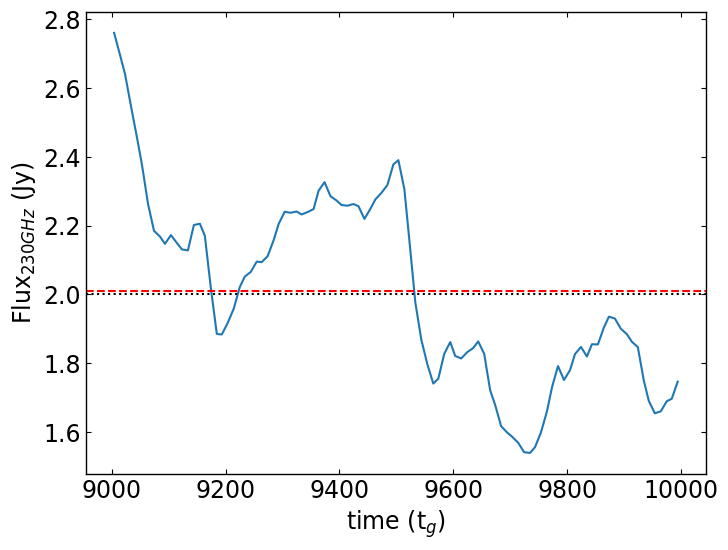

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [33]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.760849 Jy at 9004.234232
98:: 2.696011 Jy at 9014.746059
99:: 2.640327 Jy at 9023.505435
100:: 2.546665 Jy at 9034.016452
101:: 2.455373 Jy at 9044.529609
102:: 2.376131 Jy at 9053.290056
103:: 2.263624 Jy at 9063.802536
104:: 2.185049 Jy at 9074.314016
105:: 2.168284 Jy at 9084.823874
106:: 2.147232 Jy at 9093.581252
107:: 2.172543 Jy at 9104.090482
108:: 2.149556 Jy at 9114.601360
109:: 2.131038 Jy at 9123.359993
110:: 2.128073 Jy at 9133.870253
111:: 2.201880 Jy at 9144.379583
112:: 2.205822 Jy at 9154.889223
113:: 2.170577 Jy at 9163.648327
114:: 2.018707 Jy at 9174.157990
115:: 1.885174 Jy at 9184.666192
116:: 1.883498 Jy at 9193.424046
117:: 1.917759 Jy at 9203.933544
118:: 1.958990 Jy at 9214.444133
119:: 2.021363 Jy at 9224.955775
120:: 2.051810 Jy at 9233.717169
121:: 2.065387 Jy at 9244.228854
122:: 2.095534 Jy at 9254.740756
123:: 2.093913 Jy at 9263.502558
124:: 2.111604 Jy at 9274.015079
125:: 2.158281 Jy at 9284.527261
126:: 2.205251 Jy at 9293.287130
127:: 2.24032

In [34]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc90/BHOSS_CODE
97, flux: 2.739635 at 9004.234232
98, flux: 2.738113 at 9014.746059
99, flux: 2.685385 at 9023.505435
100, flux: 2.564648 at 9034.016452
101, flux: 2.479600 at 9044.529609
102, flux: 2.425462 at 9053.290056
103, flux: 2.343513 at 9063.802536
104, flux: 2.322991 at 9074.314016
105, flux: 2.185264 at 9084.823874
106, flux: 2.329553 at 9093.581252
107, flux: 2.367681 at 9104.090482
108, flux: 2.438566 at 9114.601360
109, flux: 2.389106 at 9123.359993
110, flux: 2.395662 at 9133.870253
111, flux: 2.543803 at 9144.379583
112, flux: 2.514974 at 9154.889223
113, flux: 2.490328 at 9163.648327
114, flux: 2.144382 at 9174.157990
115, flux: 1.965526 at 9184.666192
116, flux: 1.998104 at 9193.424046
117, flux: 2.091087 at 9203.933544
118, flux: 2.142868 at 9214.444133
119, flux: 2.225867 at 9224.955775
120, flux: 2.262427 at 9233.717169
121, flux: 2.278303 at 9244.228854
122, flux: 2.280772 at 9254.740756
123, flux

In [35]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [36]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.072301 Jy, the density scale = 1.510000e-18


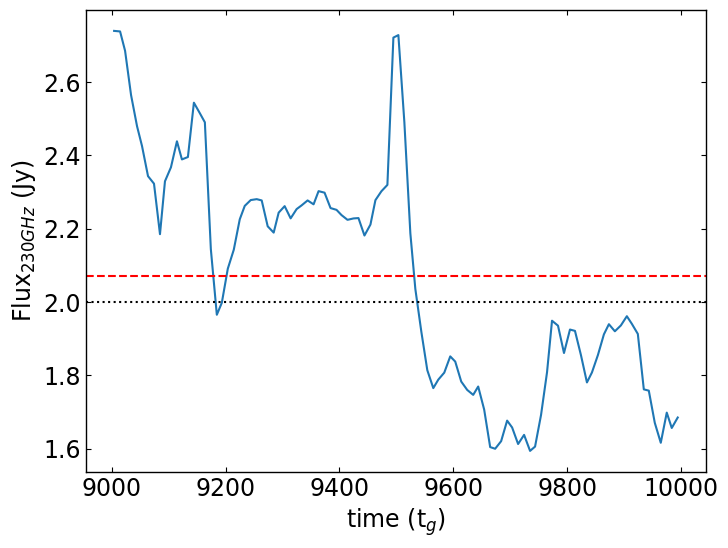

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [38]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.739635 Jy at 9004.234232
98:: 2.738113 Jy at 9014.746059
99:: 2.685385 Jy at 9023.505435
100:: 2.564648 Jy at 9034.016452
101:: 2.479600 Jy at 9044.529609
102:: 2.425462 Jy at 9053.290056
103:: 2.343513 Jy at 9063.802536
104:: 2.322991 Jy at 9074.314016
105:: 2.185264 Jy at 9084.823874
106:: 2.329553 Jy at 9093.581252
107:: 2.367681 Jy at 9104.090482
108:: 2.438566 Jy at 9114.601360
109:: 2.389106 Jy at 9123.359993
110:: 2.395662 Jy at 9133.870253
111:: 2.543803 Jy at 9144.379583
112:: 2.514974 Jy at 9154.889223
113:: 2.490328 Jy at 9163.648327
114:: 2.144382 Jy at 9174.157990
115:: 1.965526 Jy at 9184.666192
116:: 1.998104 Jy at 9193.424046
117:: 2.091087 Jy at 9203.933544
118:: 2.142868 Jy at 9214.444133
119:: 2.225867 Jy at 9224.955775
120:: 2.262427 Jy at 9233.717169
121:: 2.278303 Jy at 9244.228854
122:: 2.280772 Jy at 9254.740756
123:: 2.277251 Jy at 9263.502558
124:: 2.206724 Jy at 9274.015079
125:: 2.189526 Jy at 9284.527261
126:: 2.243978 Jy at 9293.287130
127:: 2.26171

## Rhigh=40

In [17]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 10, 0, "MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.483066 at 9004.234232
98, flux: 2.443939 at 9014.746059
99, flux: 2.409841 at 9023.505435
100, flux: 2.322954 at 9034.016452
101, flux: 2.251037 at 9044.529609
102, flux: 2.207195 at 9053.290056
103, flux: 2.129155 at 9063.802536
104, flux: 2.072512 at 9074.314016
105, flux: 2.078236 at 9084.823874
106, flux: 2.064223 at 9093.581252
107, flux: 2.081735 at 9104.090482
108, flux: 2.089524 at 9114.601360
109, flux: 2.075104 at 9123.359993
110, flux: 2.086853 at 9133.870253
111, flux: 2.100368 at 9144.379583
112, flux: 2.110369 at 9154.889223
113, flux: 2.103766 at 9163.648327
114, flux: 2.094621 at 9174.157990
115, flux: 2.073504 at 9184.666192
116, flux: 2.074846 at 9193.424046
117, flux: 2.064612 at 9203.933544
118, flux: 2.091499 at 9214.444133
119, flux: 2.117674 at 9224.955775
120, flux: 2.122039 at 9233.717169
121, flux: 2.135423 a

In [18]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [19]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.002029 Jy, the density scale = 2.420000e-18


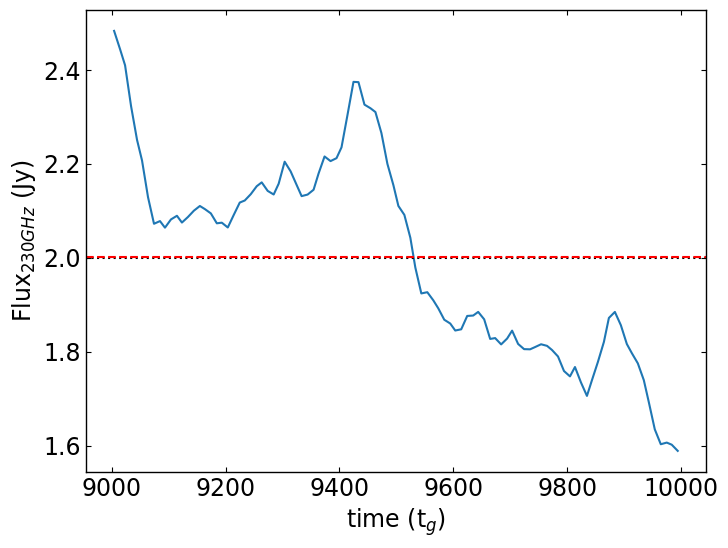

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [17]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc30/BHOSS_CODE
97, flux: 2.698670 at 9004.234232
98, flux: 2.655637 at 9014.746059
99, flux: 2.620132 at 9023.505435
100, flux: 2.532113 at 9034.016452
101, flux: 2.447948 at 9044.529609
102, flux: 2.395733 at 9053.290056
103, flux: 2.307663 at 9063.802536
104, flux: 2.224838 at 9074.314016
105, flux: 2.213739 at 9084.823874
106, flux: 2.196028 at 9093.581252
107, flux: 2.242617 at 9104.090482
108, flux: 2.245374 at 9114.601360
109, flux: 2.214644 at 9123.359993
110, flux: 2.204716 at 9133.870253
111, flux: 2.220521 at 9144.379583
112, flux: 2.227685 at 9154.889223
113, flux: 2.218524 at 9163.648327
114, flux: 2.195427 at 9174.157990
115, flux: 2.154266 at 9184.666192
116, flux: 2.138059 at 9193.424046
117, flux: 2.105977 at 9203.933544
118, flux: 2.108623 at 9214.444133
119, flux: 2.119612 at 9224.955775
120, flux: 2.122950 at 9233.717169
121, flux: 2.140335 at 9244.228854
122, flux: 2.167214 at 9254.740756
123, flux

In [18]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [19]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.072177 Jy, the density scale = 2.290000e-18


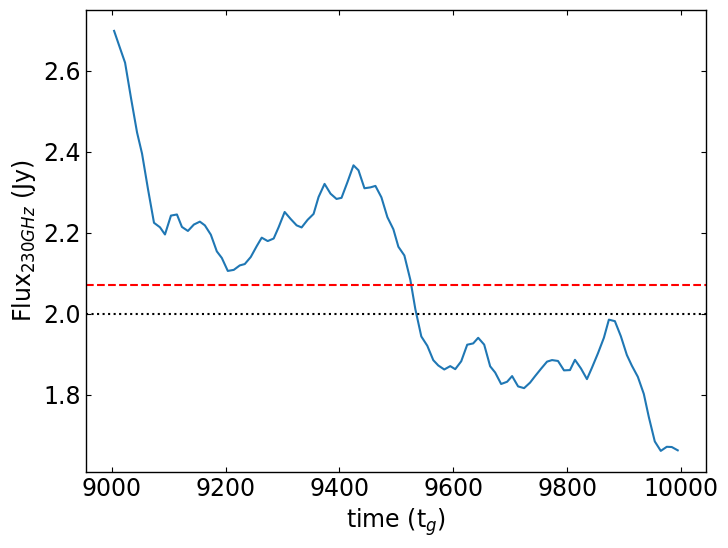

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [21]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.698670 Jy at 9004.234232
98:: 2.655637 Jy at 9014.746059
99:: 2.620132 Jy at 9023.505435
100:: 2.532113 Jy at 9034.016452
101:: 2.447948 Jy at 9044.529609
102:: 2.395733 Jy at 9053.290056
103:: 2.307663 Jy at 9063.802536
104:: 2.224838 Jy at 9074.314016
105:: 2.213739 Jy at 9084.823874
106:: 2.196028 Jy at 9093.581252
107:: 2.242617 Jy at 9104.090482
108:: 2.245374 Jy at 9114.601360
109:: 2.214644 Jy at 9123.359993
110:: 2.204716 Jy at 9133.870253
111:: 2.220521 Jy at 9144.379583
112:: 2.227685 Jy at 9154.889223
113:: 2.218524 Jy at 9163.648327
114:: 2.195427 Jy at 9174.157990
115:: 2.154266 Jy at 9184.666192
116:: 2.138059 Jy at 9193.424046
117:: 2.105977 Jy at 9203.933544
118:: 2.108623 Jy at 9214.444133
119:: 2.119612 Jy at 9224.955775
120:: 2.122950 Jy at 9233.717169
121:: 2.140335 Jy at 9244.228854
122:: 2.167214 Jy at 9254.740756
123:: 2.188124 Jy at 9263.502558
124:: 2.179730 Jy at 9274.015079
125:: 2.186035 Jy at 9284.527261
126:: 2.214134 Jy at 9293.287130
127:: 2.25154

In [21]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 50, 0, "MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.744697 at 9004.234232
98, flux: 2.684109 at 9014.746059
99, flux: 2.641499 at 9023.505435
100, flux: 2.550515 at 9034.016452
101, flux: 2.456541 at 9044.529609
102, flux: 2.391966 at 9053.290056
103, flux: 2.287397 at 9063.802536
104, flux: 2.174853 at 9074.314016
105, flux: 2.146513 at 9084.823874
106, flux: 2.134941 at 9093.581252
107, flux: 2.191617 at 9104.090482
108, flux: 2.167285 at 9114.601360
109, flux: 2.127241 at 9123.359993
110, flux: 2.115556 at 9133.870253
111, flux: 2.154179 at 9144.379583
112, flux: 2.168230 at 9154.889223
113, flux: 2.161816 at 9163.648327
114, flux: 2.141392 at 9174.157990
115, flux: 2.058670 at 9184.666192
116, flux: 2.007194 at 9193.424046
117, flux: 1.967854 at 9203.933544
118, flux: 1.963058 at 9214.444133
119, flux: 1.962396 at 9224.955775
120, flux: 1.964776 at 9233.717169
121, flux: 1.975897 a

In [22]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [23]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.004098 Jy, the density scale = 2.050000e-18


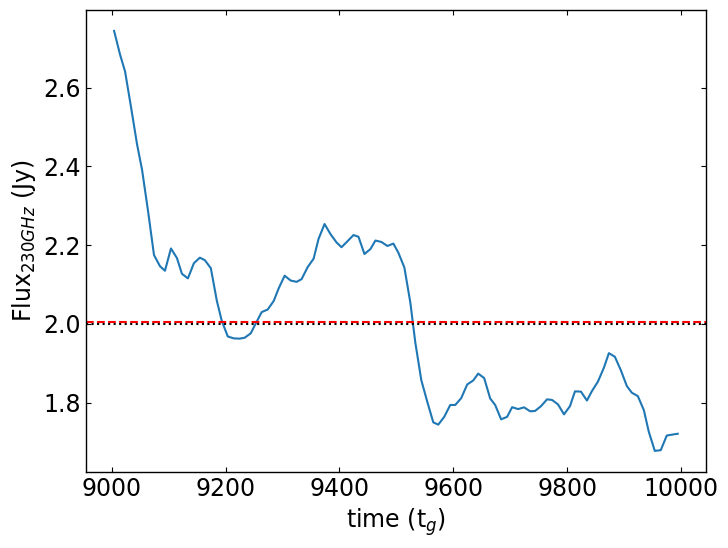

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [27]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc70/BHOSS_CODE
97, flux: 2.863024 at 9004.234232
98, flux: 2.815435 at 9014.746059
99, flux: 2.796989 at 9023.505435
100, flux: 2.698810 at 9034.016452
101, flux: 2.592465 at 9044.529609
102, flux: 2.505377 at 9053.290056
103, flux: 2.386124 at 9063.802536
104, flux: 2.280629 at 9074.314016
105, flux: 2.293146 at 9084.823874
106, flux: 2.241490 at 9093.581252
107, flux: 2.274763 at 9104.090482
108, flux: 2.279615 at 9114.601360
109, flux: 2.233691 at 9123.359993
110, flux: 2.216189 at 9133.870253
111, flux: 2.307689 at 9144.379583
112, flux: 2.303194 at 9154.889223
113, flux: 2.249263 at 9163.648327
114, flux: 2.074250 at 9174.157990
115, flux: 1.944425 at 9184.666192
116, flux: 1.948385 at 9193.424046
117, flux: 1.968675 at 9203.933544
118, flux: 1.993402 at 9214.444133
119, flux: 2.037050 at 9224.955775
120, flux: 2.037102 at 9233.717169
121, flux: 2.029243 at 9244.228854
122, flux: 2.063544 at 9254.740756
123, flux

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.092169 Jy, the density scale = 1.950000e-18


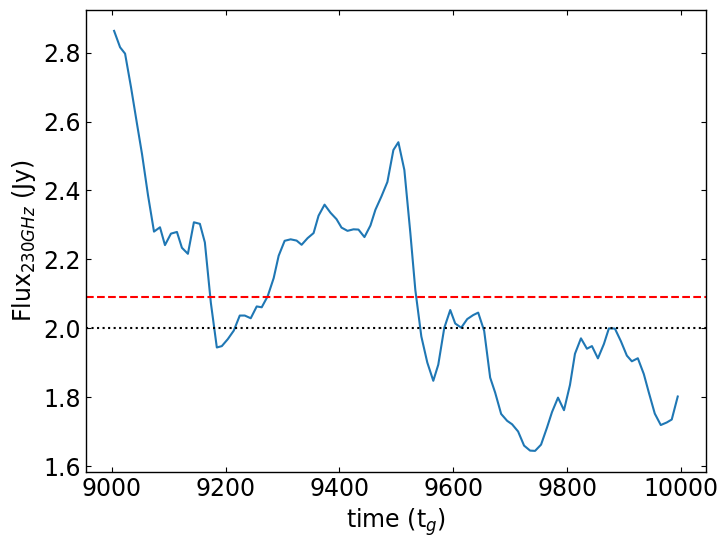

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.863024 Jy at 9004.234232
98:: 2.815435 Jy at 9014.746059
99:: 2.796989 Jy at 9023.505435
100:: 2.698810 Jy at 9034.016452
101:: 2.592465 Jy at 9044.529609
102:: 2.505377 Jy at 9053.290056
103:: 2.386124 Jy at 9063.802536
104:: 2.280629 Jy at 9074.314016
105:: 2.293146 Jy at 9084.823874
106:: 2.241490 Jy at 9093.581252
107:: 2.274763 Jy at 9104.090482
108:: 2.279615 Jy at 9114.601360
109:: 2.233691 Jy at 9123.359993
110:: 2.216189 Jy at 9133.870253
111:: 2.307689 Jy at 9144.379583
112:: 2.303194 Jy at 9154.889223
113:: 2.249263 Jy at 9163.648327
114:: 2.074250 Jy at 9174.157990
115:: 1.944425 Jy at 9184.666192
116:: 1.948385 Jy at 9193.424046
117:: 1.968675 Jy at 9203.933544
118:: 1.993402 Jy at 9214.444133
119:: 2.037050 Jy at 9224.955775
120:: 2.037102 Jy at 9233.717169
121:: 2.029243 Jy at 9244.228854
122:: 2.063544 Jy at 9254.740756
123:: 2.061051 Jy at 9263.502558
124:: 2.093210 Jy at 9274.015079
125:: 2.145764 Jy at 9284.527261
126:: 2.210642 Jy at 9293.287130
127:: 2.25395

In [25]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 90, 0, "MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.801735 at 9004.234232
98, flux: 2.811662 at 9014.746059
99, flux: 2.789297 at 9023.505435
100, flux: 2.666581 at 9034.016452
101, flux: 2.565323 at 9044.529609
102, flux: 2.495727 at 9053.290056
103, flux: 2.409111 at 9063.802536
104, flux: 2.326318 at 9074.314016
105, flux: 2.232235 at 9084.823874
106, flux: 2.324928 at 9093.581252
107, flux: 2.401693 at 9104.090482
108, flux: 2.479197 at 9114.601360
109, flux: 2.412792 at 9123.359993
110, flux: 2.423170 at 9133.870253
111, flux: 2.571485 at 9144.379583
112, flux: 2.546346 at 9154.889223
113, flux: 2.489728 at 9163.648327
114, flux: 2.125420 at 9174.157990
115, flux: 1.968241 at 9184.666192
116, flux: 1.965174 at 9193.424046
117, flux: 2.024245 at 9203.933544
118, flux: 2.067707 at 9214.444133
119, flux: 2.127916 at 9224.955775
120, flux: 2.129189 at 9233.717169
121, flux: 2.128391 a

In [26]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [27]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.082669 Jy, the density scale = 1.920000e-18


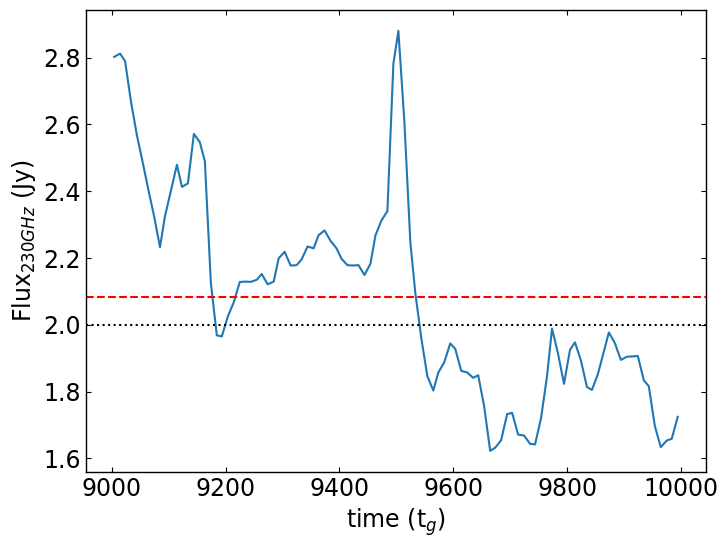

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

## Rhigh=80

In [2]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc10/BHOSS_CODE
97, flux: 2.440575 at 9004.234232
98, flux: 2.419963 at 9014.746059
99, flux: 2.402134 at 9023.505435
100, flux: 2.324906 at 9034.016452
101, flux: 2.244509 at 9044.529609
102, flux: 2.198221 at 9053.290056
103, flux: 2.131927 at 9063.802536
104, flux: 2.076335 at 9074.314016
105, flux: 2.099383 at 9084.823874
106, flux: 2.088289 at 9093.581252
107, flux: 2.112537 at 9104.090482
108, flux: 2.142901 at 9114.601360
109, flux: 2.113752 at 9123.359993
110, flux: 2.091594 at 9133.870253
111, flux: 2.092793 at 9144.379583
112, flux: 2.099681 at 9154.889223
113, flux: 2.087161 at 9163.648327
114, flux: 2.075793 at 9174.157990
115, flux: 2.095102 at 9184.666192
116, flux: 2.117106 at 9193.424046
117, flux: 2.096495 at 9203.933544
118, flux: 2.103950 at 9214.444133
119, flux: 2.113397 at 9224.955775
120, flux: 2.098734 at 9233.717169
121, flux: 2.092675 at 9244.228854
122, flux: 2.108245 at 9254.740756
123, flux

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.020542 Jy, the density scale = 3.100000e-18


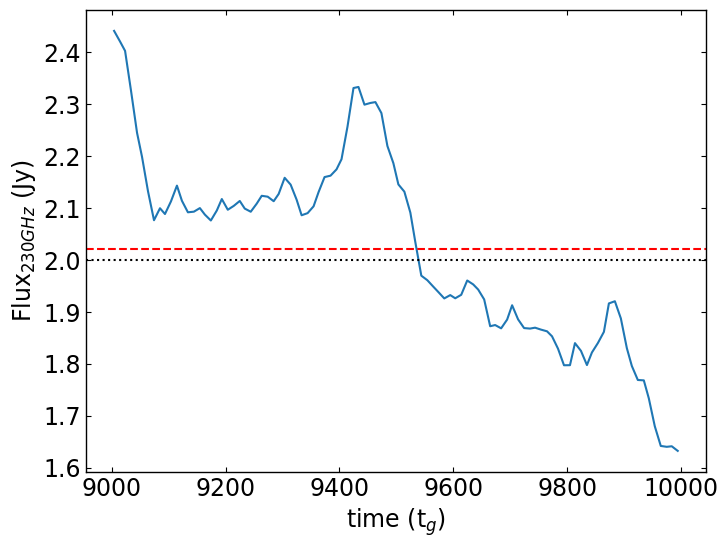

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.440575 Jy at 9004.234232
98:: 2.419963 Jy at 9014.746059
99:: 2.402134 Jy at 9023.505435
100:: 2.324906 Jy at 9034.016452
101:: 2.244509 Jy at 9044.529609
102:: 2.198221 Jy at 9053.290056
103:: 2.131927 Jy at 9063.802536
104:: 2.076335 Jy at 9074.314016
105:: 2.099383 Jy at 9084.823874
106:: 2.088289 Jy at 9093.581252
107:: 2.112537 Jy at 9104.090482
108:: 2.142901 Jy at 9114.601360
109:: 2.113752 Jy at 9123.359993
110:: 2.091594 Jy at 9133.870253
111:: 2.092793 Jy at 9144.379583
112:: 2.099681 Jy at 9154.889223
113:: 2.087161 Jy at 9163.648327
114:: 2.075793 Jy at 9174.157990
115:: 2.095102 Jy at 9184.666192
116:: 2.117106 Jy at 9193.424046
117:: 2.096495 Jy at 9203.933544
118:: 2.103950 Jy at 9214.444133
119:: 2.113397 Jy at 9224.955775
120:: 2.098734 Jy at 9233.717169
121:: 2.092675 Jy at 9244.228854
122:: 2.108245 Jy at 9254.740756
123:: 2.123330 Jy at 9263.502558
124:: 2.121633 Jy at 9274.015079
125:: 2.112929 Jy at 9284.527261
126:: 2.126902 Jy at 9293.287130
127:: 2.15796

In [36]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc30/BHOSS_CODE
97, flux: 2.635430 at 9004.234232
98, flux: 2.611915 at 9014.746059
99, flux: 2.597071 at 9023.505435
100, flux: 2.520480 at 9034.016452
101, flux: 2.429802 at 9044.529609
102, flux: 2.375556 at 9053.290056
103, flux: 2.297007 at 9063.802536
104, flux: 2.211636 at 9074.314016
105, flux: 2.215727 at 9084.823874
106, flux: 2.201299 at 9093.581252
107, flux: 2.253134 at 9104.090482
108, flux: 2.277258 at 9114.601360
109, flux: 2.234007 at 9123.359993
110, flux: 2.196200 at 9133.870253
111, flux: 2.203134 at 9144.379583
112, flux: 2.214699 at 9154.889223
113, flux: 2.200442 at 9163.648327
114, flux: 2.172598 at 9174.157990
115, flux: 2.170737 at 9184.666192
116, flux: 2.172136 at 9193.424046
117, flux: 2.125193 at 9203.933544
118, flux: 2.100843 at 9214.444133
119, flux: 2.090025 at 9224.955775
120, flux: 2.068451 at 9233.717169
121, flux: 2.056861 at 9244.228854
122, flux: 2.074404 at 9254.740756
123, flux

In [37]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [38]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.052880 Jy, the density scale = 2.900000e-18


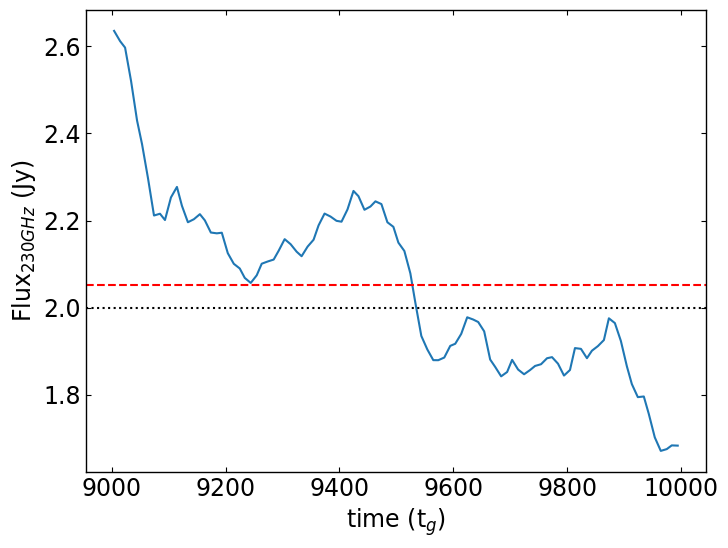

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [40]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.635430 Jy at 9004.234232
98:: 2.611915 Jy at 9014.746059
99:: 2.597071 Jy at 9023.505435
100:: 2.520480 Jy at 9034.016452
101:: 2.429802 Jy at 9044.529609
102:: 2.375556 Jy at 9053.290056
103:: 2.297007 Jy at 9063.802536
104:: 2.211636 Jy at 9074.314016
105:: 2.215727 Jy at 9084.823874
106:: 2.201299 Jy at 9093.581252
107:: 2.253134 Jy at 9104.090482
108:: 2.277258 Jy at 9114.601360
109:: 2.234007 Jy at 9123.359993
110:: 2.196200 Jy at 9133.870253
111:: 2.203134 Jy at 9144.379583
112:: 2.214699 Jy at 9154.889223
113:: 2.200442 Jy at 9163.648327
114:: 2.172598 Jy at 9174.157990
115:: 2.170737 Jy at 9184.666192
116:: 2.172136 Jy at 9193.424046
117:: 2.125193 Jy at 9203.933544
118:: 2.100843 Jy at 9214.444133
119:: 2.090025 Jy at 9224.955775
120:: 2.068451 Jy at 9233.717169
121:: 2.056861 Jy at 9244.228854
122:: 2.074404 Jy at 9254.740756
123:: 2.100988 Jy at 9263.502558
124:: 2.106096 Jy at 9274.015079
125:: 2.110547 Jy at 9284.527261
126:: 2.130781 Jy at 9293.287130
127:: 2.15736

In [21]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc50/BHOSS_CODE
97, flux: 2.893739 at 9004.234232
98, flux: 2.844257 at 9014.746059
99, flux: 2.818290 at 9023.505435
100, flux: 2.735381 at 9034.016452
101, flux: 2.629105 at 9044.529609
102, flux: 2.553746 at 9053.290056
103, flux: 2.446524 at 9063.802536
104, flux: 2.320134 at 9074.314016
105, flux: 2.309404 at 9084.823874
106, flux: 2.307742 at 9093.581252
107, flux: 2.370635 at 9104.090482
108, flux: 2.357050 at 9114.601360
109, flux: 2.302294 at 9123.359993
110, flux: 2.269071 at 9133.870253
111, flux: 2.303874 at 9144.379583
112, flux: 2.328965 at 9154.889223
113, flux: 2.317548 at 9163.648327
114, flux: 2.294013 at 9174.157990
115, flux: 2.236884 at 9184.666192
116, flux: 2.194481 at 9193.424046
117, flux: 2.140077 at 9203.933544
118, flux: 2.107264 at 9214.444133
119, flux: 2.075719 at 9224.955775
120, flux: 2.044866 at 9233.717169
121, flux: 2.021833 at 9244.228854
122, flux: 2.038054 at 9254.740756
123, flux

In [22]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [23]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.131365 Jy, the density scale = 2.710000e-18


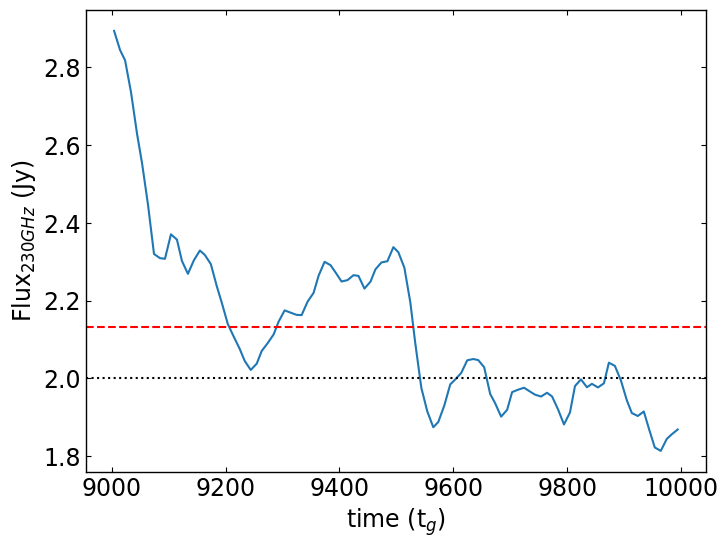

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [25]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.893739 Jy at 9004.234232
98:: 2.844257 Jy at 9014.746059
99:: 2.818290 Jy at 9023.505435
100:: 2.735381 Jy at 9034.016452
101:: 2.629105 Jy at 9044.529609
102:: 2.553746 Jy at 9053.290056
103:: 2.446524 Jy at 9063.802536
104:: 2.320134 Jy at 9074.314016
105:: 2.309404 Jy at 9084.823874
106:: 2.307742 Jy at 9093.581252
107:: 2.370635 Jy at 9104.090482
108:: 2.357050 Jy at 9114.601360
109:: 2.302294 Jy at 9123.359993
110:: 2.269071 Jy at 9133.870253
111:: 2.303874 Jy at 9144.379583
112:: 2.328965 Jy at 9154.889223
113:: 2.317548 Jy at 9163.648327
114:: 2.294013 Jy at 9174.157990
115:: 2.236884 Jy at 9184.666192
116:: 2.194481 Jy at 9193.424046
117:: 2.140077 Jy at 9203.933544
118:: 2.107264 Jy at 9214.444133
119:: 2.075719 Jy at 9224.955775
120:: 2.044866 Jy at 9233.717169
121:: 2.021833 Jy at 9244.228854
122:: 2.038054 Jy at 9254.740756
123:: 2.070692 Jy at 9263.502558
124:: 2.090899 Jy at 9274.015079
125:: 2.113462 Jy at 9284.527261
126:: 2.146403 Jy at 9293.287130
127:: 2.17505

In [26]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc70/BHOSS_CODE
97, flux: 2.756209 at 9004.234232
98, flux: 2.745923 at 9014.746059
99, flux: 2.785681 at 9023.505435
100, flux: 2.717694 at 9034.016452
101, flux: 2.615655 at 9044.529609
102, flux: 2.532804 at 9053.290056
103, flux: 2.407439 at 9063.802536
104, flux: 2.283781 at 9074.314016
105, flux: 2.325178 at 9084.823874
106, flux: 2.264201 at 9093.581252
107, flux: 2.288132 at 9104.090482
108, flux: 2.316593 at 9114.601360
109, flux: 2.254308 at 9123.359993
110, flux: 2.219988 at 9133.870253
111, flux: 2.308630 at 9144.379583
112, flux: 2.301066 at 9154.889223
113, flux: 2.224357 at 9163.648327
114, flux: 2.028272 at 9174.157990
115, flux: 1.923956 at 9184.666192
116, flux: 1.944617 at 9193.424046
117, flux: 1.956177 at 9203.933544
118, flux: 1.952246 at 9214.444133
119, flux: 1.974322 at 9224.955775
120, flux: 1.936450 at 9233.717169
121, flux: 1.895640 at 9244.228854
122, flux: 1.923841 at 9254.740756
123, flux

In [27]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [28]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.077424 Jy, the density scale = 2.470000e-18


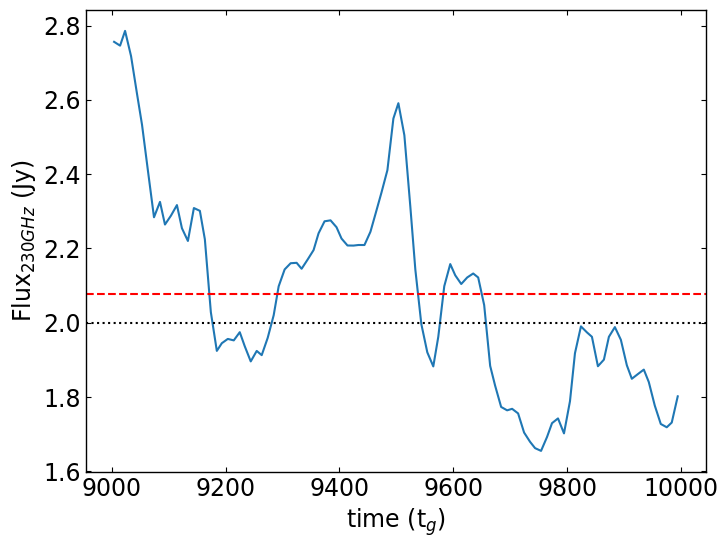

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [30]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.756209 Jy at 9004.234232
98:: 2.745923 Jy at 9014.746059
99:: 2.785681 Jy at 9023.505435
100:: 2.717694 Jy at 9034.016452
101:: 2.615655 Jy at 9044.529609
102:: 2.532804 Jy at 9053.290056
103:: 2.407439 Jy at 9063.802536
104:: 2.283781 Jy at 9074.314016
105:: 2.325178 Jy at 9084.823874
106:: 2.264201 Jy at 9093.581252
107:: 2.288132 Jy at 9104.090482
108:: 2.316593 Jy at 9114.601360
109:: 2.254308 Jy at 9123.359993
110:: 2.219988 Jy at 9133.870253
111:: 2.308630 Jy at 9144.379583
112:: 2.301066 Jy at 9154.889223
113:: 2.224357 Jy at 9163.648327
114:: 2.028272 Jy at 9174.157990
115:: 1.923956 Jy at 9184.666192
116:: 1.944617 Jy at 9193.424046
117:: 1.956177 Jy at 9203.933544
118:: 1.952246 Jy at 9214.444133
119:: 1.974322 Jy at 9224.955775
120:: 1.936450 Jy at 9233.717169
121:: 1.895640 Jy at 9244.228854
122:: 1.923841 Jy at 9254.740756
123:: 1.912498 Jy at 9263.502558
124:: 1.959041 Jy at 9274.015079
125:: 2.019921 Jy at 9284.527261
126:: 2.097858 Jy at 9293.287130
127:: 2.14332

In [31]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc90/BHOSS_CODE
97, flux: 2.754404 at 9004.234232
98, flux: 2.787940 at 9014.746059
99, flux: 2.802061 at 9023.505435
100, flux: 2.702217 at 9034.016452
101, flux: 2.592249 at 9044.529609
102, flux: 2.515822 at 9053.290056
103, flux: 2.421340 at 9063.802536
104, flux: 2.297298 at 9074.314016
105, flux: 2.240280 at 9084.823874
106, flux: 2.309539 at 9093.581252
107, flux: 2.406190 at 9104.090482
108, flux: 2.495327 at 9114.601360
109, flux: 2.427007 at 9123.359993
110, flux: 2.412431 at 9133.870253
111, flux: 2.524239 at 9144.379583
112, flux: 2.523922 at 9154.889223
113, flux: 2.425503 at 9163.648327
114, flux: 2.068593 at 9174.157990
115, flux: 1.954561 at 9184.666192
116, flux: 1.943672 at 9193.424046
117, flux: 1.965995 at 9203.933544
118, flux: 1.969255 at 9214.444133
119, flux: 1.990868 at 9224.955775
120, flux: 1.964546 at 9233.717169
121, flux: 1.945807 at 9244.228854
122, flux: 1.946579 at 9254.740756
123, flux

In [32]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [33]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh80/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.055025 Jy, the density scale = 2.450000e-18


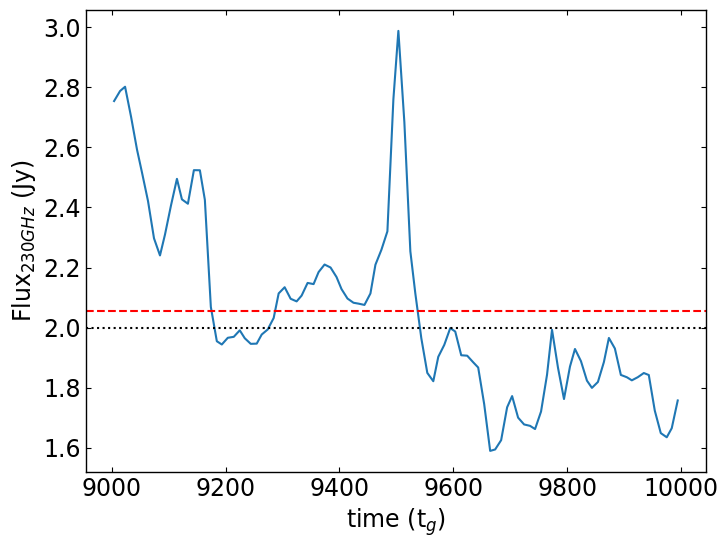

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [35]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.754404 Jy at 9004.234232
98:: 2.787940 Jy at 9014.746059
99:: 2.802061 Jy at 9023.505435
100:: 2.702217 Jy at 9034.016452
101:: 2.592249 Jy at 9044.529609
102:: 2.515822 Jy at 9053.290056
103:: 2.421340 Jy at 9063.802536
104:: 2.297298 Jy at 9074.314016
105:: 2.240280 Jy at 9084.823874
106:: 2.309539 Jy at 9093.581252
107:: 2.406190 Jy at 9104.090482
108:: 2.495327 Jy at 9114.601360
109:: 2.427007 Jy at 9123.359993
110:: 2.412431 Jy at 9133.870253
111:: 2.524239 Jy at 9144.379583
112:: 2.523922 Jy at 9154.889223
113:: 2.425503 Jy at 9163.648327
114:: 2.068593 Jy at 9174.157990
115:: 1.954561 Jy at 9184.666192
116:: 1.943672 Jy at 9193.424046
117:: 1.965995 Jy at 9203.933544
118:: 1.969255 Jy at 9214.444133
119:: 1.990868 Jy at 9224.955775
120:: 1.964546 Jy at 9233.717169
121:: 1.945807 Jy at 9244.228854
122:: 1.946579 Jy at 9254.740756
123:: 1.976929 Jy at 9263.502558
124:: 1.993626 Jy at 9274.015079
125:: 2.032002 Jy at 9284.527261
126:: 2.113762 Jy at 9293.287130
127:: 2.13435

## Rhigh=160

In [29]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 10, 0, "MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.440958 at 9004.234232
98, flux: 2.446956 at 9014.746059
99, flux: 2.452000 at 9023.505435
100, flux: 2.386369 at 9034.016452
101, flux: 2.295903 at 9044.529609
102, flux: 2.248823 at 9053.290056
103, flux: 2.198328 at 9063.802536
104, flux: 2.142806 at 9074.314016
105, flux: 2.172897 at 9084.823874
106, flux: 2.181583 at 9093.581252
107, flux: 2.216860 at 9104.090482
108, flux: 2.256093 at 9114.601360
109, flux: 2.213895 at 9123.359993
110, flux: 2.161943 at 9133.870253
111, flux: 2.151191 at 9144.379583
112, flux: 2.159754 at 9154.889223
113, flux: 2.139256 at 9163.648327
114, flux: 2.127918 at 9174.157990
115, flux: 2.193245 at 9184.666192
116, flux: 2.249563 at 9193.424046
117, flux: 2.228169 at 9203.933544
118, flux: 2.219323 at 9214.444133
119, flux: 2.211744 at 9224.955775
120, flux: 2.181635 at 9233.717169
121, flux: 2.160950 

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.106506 Jy, the density scale = 4.180000e-18


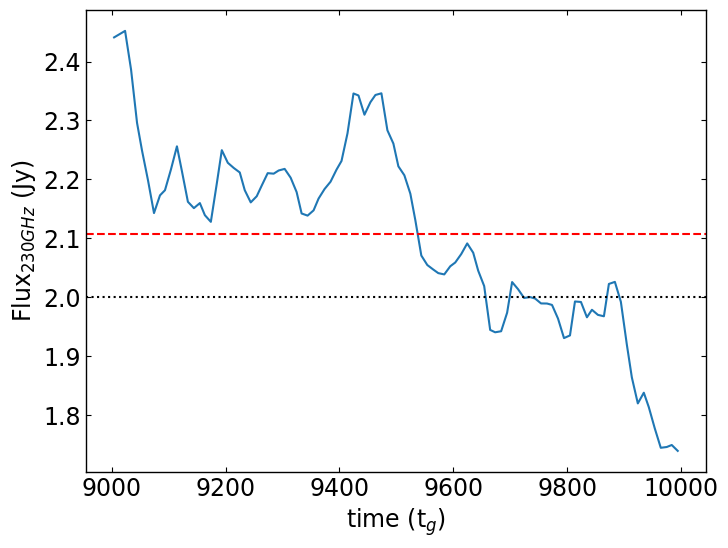

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [19]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc30/BHOSS_CODE
97, flux: 2.638139 at 9004.234232
98, flux: 2.643247 at 9014.746059
99, flux: 2.654377 at 9023.505435
100, flux: 2.594715 at 9034.016452
101, flux: 2.498040 at 9044.529609
102, flux: 2.446642 at 9053.290056
103, flux: 2.385794 at 9063.802536
104, flux: 2.298686 at 9074.314016
105, flux: 2.305619 at 9084.823874
106, flux: 2.312705 at 9093.581252
107, flux: 2.369680 at 9104.090482
108, flux: 2.399848 at 9114.601360
109, flux: 2.346724 at 9123.359993
110, flux: 2.285698 at 9133.870253
111, flux: 2.283882 at 9144.379583
112, flux: 2.302136 at 9154.889223
113, flux: 2.284215 at 9163.648327
114, flux: 2.253555 at 9174.157990
115, flux: 2.290133 at 9184.666192
116, flux: 2.321425 at 9193.424046
117, flux: 2.266058 at 9203.933544
118, flux: 2.220015 at 9214.444133
119, flux: 2.191201 at 9224.955775
120, flux: 2.147302 at 9233.717169
121, flux: 2.109769 at 9244.228854
122, flux: 2.110678 at 9254.740756
123, flu

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.120217 Jy, the density scale = 3.890000e-18


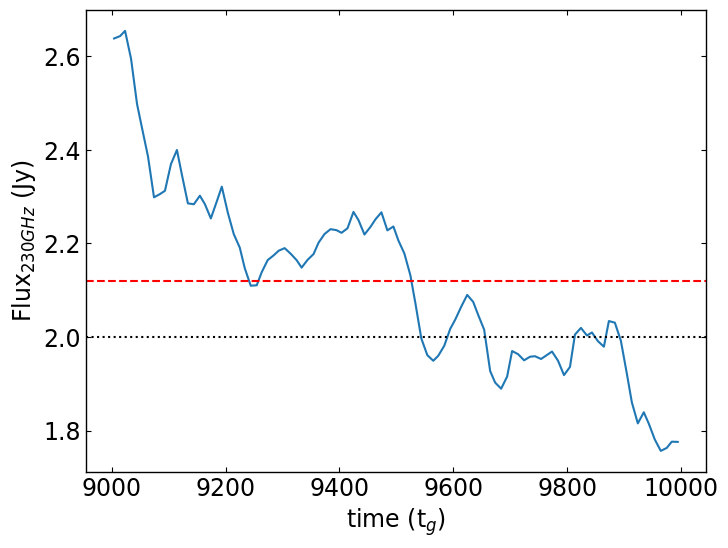

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [23]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.638139 Jy at 9004.234232
98:: 2.643247 Jy at 9014.746059
99:: 2.654377 Jy at 9023.505435
100:: 2.594715 Jy at 9034.016452
101:: 2.498040 Jy at 9044.529609
102:: 2.446642 Jy at 9053.290056
103:: 2.385794 Jy at 9063.802536
104:: 2.298686 Jy at 9074.314016
105:: 2.305619 Jy at 9084.823874
106:: 2.312705 Jy at 9093.581252
107:: 2.369680 Jy at 9104.090482
108:: 2.399848 Jy at 9114.601360
109:: 2.346724 Jy at 9123.359993
110:: 2.285698 Jy at 9133.870253
111:: 2.283882 Jy at 9144.379583
112:: 2.302136 Jy at 9154.889223
113:: 2.284215 Jy at 9163.648327
114:: 2.253555 Jy at 9174.157990
115:: 2.290133 Jy at 9184.666192
116:: 2.321425 Jy at 9193.424046
117:: 2.266058 Jy at 9203.933544
118:: 2.220015 Jy at 9214.444133
119:: 2.191201 Jy at 9224.955775
120:: 2.147302 Jy at 9233.717169
121:: 2.109769 Jy at 9244.228854
122:: 2.110678 Jy at 9254.740756
123:: 2.138629 Jy at 9263.502558
124:: 2.164533 Jy at 9274.015079
125:: 2.174701 Jy at 9284.527261
126:: 2.184531 Jy at 9293.287130
127:: 2.19008

In [33]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 50, 0, "MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.864574 at 9004.234232
98, flux: 2.839641 at 9014.746059
99, flux: 2.839698 at 9023.505435
100, flux: 2.785052 at 9034.016452
101, flux: 2.685897 at 9044.529609
102, flux: 2.613894 at 9053.290056
103, flux: 2.516887 at 9063.802536
104, flux: 2.382143 at 9074.314016
105, flux: 2.373345 at 9084.823874
106, flux: 2.398587 at 9093.581252
107, flux: 2.451304 at 9104.090482
108, flux: 2.433305 at 9114.601360
109, flux: 2.376784 at 9123.359993
110, flux: 2.322645 at 9133.870253
111, flux: 2.347457 at 9144.379583
112, flux: 2.389243 at 9154.889223
113, flux: 2.378484 at 9163.648327
114, flux: 2.357977 at 9174.157990
115, flux: 2.326954 at 9184.666192
116, flux: 2.310047 at 9193.424046
117, flux: 2.253890 at 9203.933544
118, flux: 2.201907 at 9214.444133
119, flux: 2.141412 at 9224.955775
120, flux: 2.078277 at 9233.717169
121, flux: 2.023337 

In [34]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [35]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.160850 Jy, the density scale = 3.600000e-18


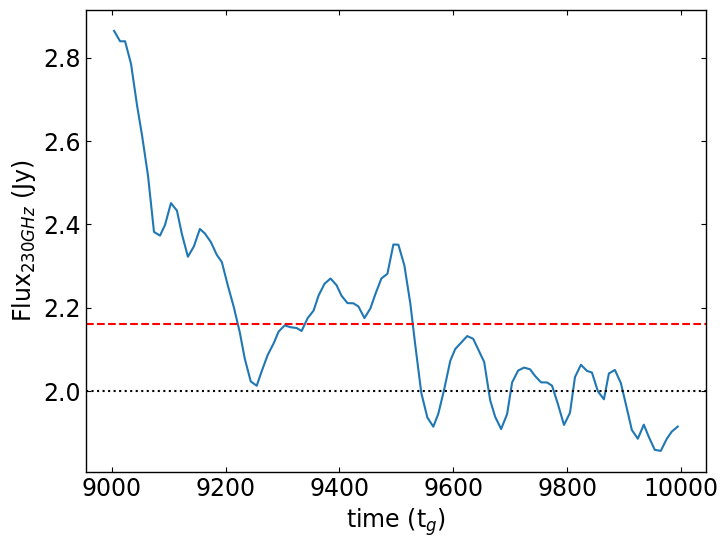

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [29]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc70/BHOSS_CODE
97, flux: 2.611498 at 9004.234232
98, flux: 2.644660 at 9014.746059
99, flux: 2.743980 at 9023.505435
100, flux: 2.735316 at 9034.016452
101, flux: 2.650060 at 9044.529609
102, flux: 2.580538 at 9053.290056
103, flux: 2.456031 at 9063.802536
104, flux: 2.324636 at 9074.314016
105, flux: 2.369808 at 9084.823874
106, flux: 2.317157 at 9093.581252
107, flux: 2.321040 at 9104.090482
108, flux: 2.359088 at 9114.601360
109, flux: 2.292802 at 9123.359993
110, flux: 2.246393 at 9133.870253
111, flux: 2.321948 at 9144.379583
112, flux: 2.314551 at 9154.889223
113, flux: 2.221183 at 9163.648327
114, flux: 2.003326 at 9174.157990
115, flux: 1.918989 at 9184.666192
116, flux: 1.965802 at 9193.424046
117, flux: 1.974654 at 9203.933544
118, flux: 1.952011 at 9214.444133
119, flux: 1.964072 at 9224.955775
120, flux: 1.889056 at 9233.717169
121, flux: 1.815438 at 9244.228854
122, flux: 1.827970 at 9254.740756
123, flu

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.071859 Jy, the density scale = 3.240000e-18


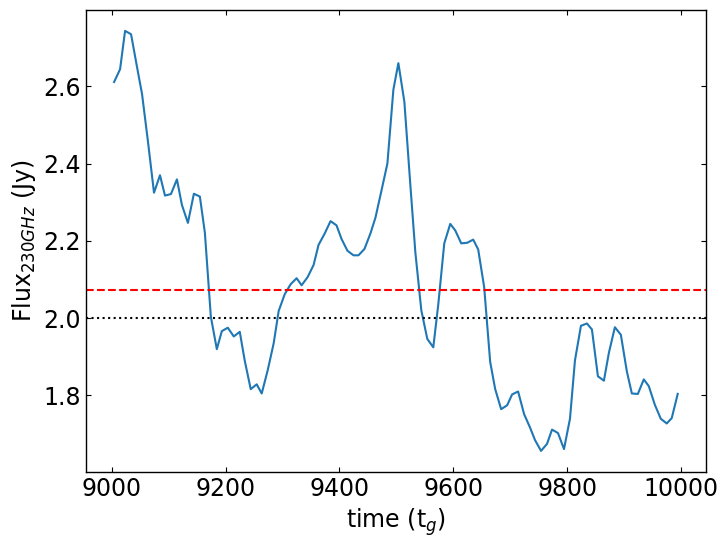

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [33]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.611498 Jy at 9004.234232
98:: 2.644660 Jy at 9014.746059
99:: 2.743980 Jy at 9023.505435
100:: 2.735316 Jy at 9034.016452
101:: 2.650060 Jy at 9044.529609
102:: 2.580538 Jy at 9053.290056
103:: 2.456031 Jy at 9063.802536
104:: 2.324636 Jy at 9074.314016
105:: 2.369808 Jy at 9084.823874
106:: 2.317157 Jy at 9093.581252
107:: 2.321040 Jy at 9104.090482
108:: 2.359088 Jy at 9114.601360
109:: 2.292802 Jy at 9123.359993
110:: 2.246393 Jy at 9133.870253
111:: 2.321948 Jy at 9144.379583
112:: 2.314551 Jy at 9154.889223
113:: 2.221183 Jy at 9163.648327
114:: 2.003326 Jy at 9174.157990
115:: 1.918989 Jy at 9184.666192
116:: 1.965802 Jy at 9193.424046
117:: 1.974654 Jy at 9203.933544
118:: 1.952011 Jy at 9214.444133
119:: 1.964072 Jy at 9224.955775
120:: 1.889056 Jy at 9233.717169
121:: 1.815438 Jy at 9244.228854
122:: 1.827970 Jy at 9254.740756
123:: 1.804169 Jy at 9263.502558
124:: 1.864467 Jy at 9274.015079
125:: 1.934319 Jy at 9284.527261
126:: 2.018005 Jy at 9293.287130
127:: 2.06113

In [37]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 90, 0, "MADS41A0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
97, flux: 2.637575 at 9004.234232
98, flux: 2.702025 at 9014.746059
99, flux: 2.755282 at 9023.505435
100, flux: 2.699736 at 9034.016452
101, flux: 2.596101 at 9044.529609
102, flux: 2.521904 at 9053.290056
103, flux: 2.420329 at 9063.802536
104, flux: 2.276748 at 9074.314016
105, flux: 2.227823 at 9084.823874
106, flux: 2.297810 at 9093.581252
107, flux: 2.399945 at 9104.090482
108, flux: 2.501787 at 9114.601360
109, flux: 2.448789 at 9123.359993
110, flux: 2.401363 at 9133.870253
111, flux: 2.458961 at 9144.379583
112, flux: 2.477487 at 9154.889223
113, flux: 2.353704 at 9163.648327
114, flux: 2.024448 at 9174.157990
115, flux: 1.942038 at 9184.666192
116, flux: 1.944176 at 9193.424046
117, flux: 1.938624 at 9203.933544
118, flux: 1.899178 at 9214.444133
119, flux: 1.883367 at 9224.955775
120, flux: 1.844387 at 9233.717169
121, flux: 1.811535 

In [38]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [39]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.017471 Jy, the density scale = 3.220000e-18


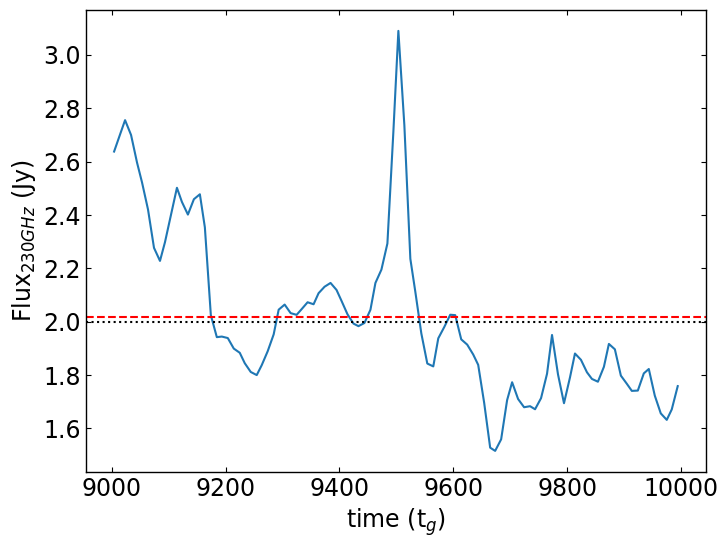

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))